In [ ]:
!pip install afinn
from afinn import Afinn

In [ ]:
afinn = Afinn(language='en')

In [ ]:
pos_index = []
neg_index = []
neutral_index = []
most_pos = []

In [ ]:
chapters = ["Chapter-5_cleaned", "Chapter-6_cleaned", "Chapter-7_cleaned"]
for i in range(3):
  chapter = open('./'+ chapters[i] + '.txt')
  data = chapter.read()
  sentences = data.split('.')
  print(data)
  pos = 0
  neg = 0
  neutral = 0

  for sentence in sentences:
    score = int(afinn.score(sentence))

    if score>0:
      pos+=1
    elif score<0:
      neg+=1
    else:
      neutral+=1
  scored_sentences = ((afinn.score(sent), sent) for sent in sentences)
  sorted_sentences = sorted(scored_sentences)
  n = len(sentences)
  pos_index.append(pos/n)
  neg_index.append(neg/n)
  neutral_index.append(neutral/n)
  most_pos.append(sorted_sentences)

 now when jesus saw the crowds, he went up on a mountainside and sat down. his disciples came to him, and he began to teach them. he said: “blessed are the poor in spirit, for theirs is the kingdom of heaven. blessed are those who mourn, for they will be comforted. blessed are the meek, for they will inherit the earth. blessed are those who hunger and thirst for righteousness, for they will be filled. blessed are the merciful, for they will be shown mercy. blessed are the pure in heart, for they will see god. blessed are the peacemakers, for they will be called children of god. blessed are those who are persecuted because of righteousness, for theirs is the kingdom of heaven. “blessed are you when people insult you, persecute you and falsely say all kinds of evil against you because of me. rejoice and be glad, because great is your reward in heaven, for in the same way they persecuted the prophets who were before you. “you are the salt of the earth. but if the salt loses its saltiness,

In [ ]:
print(pos_index)

[0.4, 0.575, 0.23076923076923078]


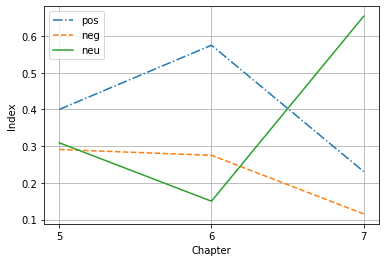

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(5,8)
plt.plot(X,pos_index,'-.',label='pos')
plt.plot(X,neg_index, '--',label='neg')
plt.plot(X,neutral_index,'-',label='neu')
plt.legend()
plt.xticks(X)
plt.xlabel('Chapter')
plt.ylabel('Index')
plt.grid()
plt.savefig('afinn-bsi.png')
plt.show()  

In [ ]:
for i in range(3):
  print("The most negative sentence in the", i+5 ,"Chapter is:")
  print(most_pos[i][0])
  print("The most positive sentence in the", i+5 , "Chapter is:")
  print(most_pos[i][-1])

The most negative sentence in the 5 Chapter is:
(-10.0, ' and anyone who says, ‘you fool!’ will be in danger of the fire of hell')
The most positive sentence in the 5 Chapter is:
(19.0, ' if you love those who love you, what reward will you get? are not even the tax collectors doing that? and if you greet only your own people, what are you doing more than others? do not even pagans do that? be perfect, therefore, as your heavenly father is perfect')
The most negative sentence in the 6 Chapter is:
(-6.0, ' are you not much more valuable than they? can any one of you by worrying add a single hour to your life? “and why do you worry about clothes? see how the flowers of the field grow')
The most positive sentence in the 6 Chapter is:
(7.0, ' “and when you pray, do not be like the hypocrites, for they love to pray standing in the synagogues and on the street corners to be seen by others')
The most negative sentence in the 7 Chapter is:
(-3.0, ' for wide is the gate and broad is the road th

# Loading BERT Model

In [ ]:
##imports
!pip install torch
import torch
import pandas as pd
# !pip install onnx
# import onnx
# !pip install onnx-tf
# from onnx_tf.backend import prepare

!pip install transformers==4.10

import transformers
from transformers import BertTokenizer, BertModel, BertConfig

import pandas as pd

import spacy
# spacy_en = spacy.load('en')
import re

from torch.utils.data import DataLoader

import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip freeze --local > /content/drive/My\ Drive/colab_installed.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/MyDrive/bertmodel.pth"

In [ ]:
class BERT(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.layer2 = torch.nn.Dropout(0.3)
        self.layer3 = torch.nn.Linear(768, 11)

    def forward(self, ids, mask, token_type_ids, return_dict = False):
        unw, out_1 = self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[0], self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[1]
        out_2 = self.layer2(out_1)
        out_final = self.layer3(out_2)
        return out_final

model = torch.load(PATH)
model

BERT(
  (layer1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
     

In [ ]:
print(model.parameters())

<generator object Module.parameters at 0x7f64702cedd0>


In [ ]:
chapter5 = pd.read_csv("/content/Chapter-7_cleaned.csv")
chapter5.head(10)

verse
0        do not judge so that you may not be judged.
1  for with the judgement you make you will be ju...
2  why do you see the speck in your neighbour s e...
3  or how can you say to your neighbour let me ta...
4  you hypocrite first take the log out of your o...
5  do not give what is holy to dogs and do not th...
6  ask and it will be given to you search and you...
7  for everyone who asks receives and everyone wh...
8  is there anyone among you who if your child as...
9  or if the child asks for a fish will give a snake

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class CustomDataset():

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.dataframe = dataframe
        self.verse = dataframe['Verse']
        self.targets = self.dataframe.list
        self.max_len = max_len

    def __len__(self):
        return len(self.verse)
    
    def __getitem__(self, index):
        verse = str(self.verse[index])
        verse = " ".join(verse.split())

        inputs = self.tokenizer.encode_plus(
            verse,
            None,
            add_special_tokens = True,
            max_length = self.max_len,
            pad_to_max_length = True,
            return_token_type_ids = True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs['token_type_ids']

        return {
            'ids' : torch.tensor(ids, dtype = torch.long),
            'mask' : torch.tensor(mask, dtype = torch.long),
            'token_type_ids' : torch.tensor(token_type_ids, dtype = torch.long),
            'targets' : torch.tensor(self.targets[index], dtype = torch.float)
        }

In [ ]:
model_df = pd.DataFrame()
model_df['Verse'] = chapter5['verse']
total_verses = chapter5.shape[0]
values = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * total_verses
model_df['list'] = values

In [ ]:
MAX_LEN = 200

# def tokenizer(verse):
#     tweet = re.sub(r'[\n]', ' ', verse)
#     return [tok.text for tok in spacy_en.tokenizer(verse)]


In [ ]:
test_dataset = CustomDataset(model_df, tokenizer, MAX_LEN)

In [ ]:
model_test_params = {'batch_size': 1,
                    'shuffle': False,
                    'num_workers': 0
                    }   

test_loader = DataLoader(test_dataset, **model_test_params)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def test():
    model.eval()
    model_outputs = []

    with torch.no_grad():
        for unw, data in enumerate(test_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            model_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

    return model_outputs

In [ ]:
test_outputs = test()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2204: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
test_outputs = np.array(test_outputs)

for i in range(test_outputs.shape[0]):
    for j in range(test_outputs.shape[1]):
        if test_outputs[i][j] >= 0.5: test_outputs[i][j] = 1
        else: test_outputs[i][j] = 0

In [ ]:
model_df['Optimistic'] = "None"
model_df['Thankful'] = "None"
model_df['Empathetic'] = "None"
model_df['Pessimistic'] = "None"
model_df['Anxious'] = "None"
model_df['Sad'] = "None"
model_df['Annoyed'] = "None"
model_df['Denial'] = "None"
model_df['Official report'] = "None"
model_df['Surprise'] = "None"
model_df['Joking'] = "None"
model_df = model_df.drop(['list'], axis = 1)

In [ ]:
for i in range(len(test_outputs)):
    model_df['Optimistic'].iloc[i] = test_outputs[i][0]
    model_df['Thankful'].iloc[i] = test_outputs[i][1]
    model_df['Empathetic'].iloc[i] = test_outputs[i][2]
    model_df['Pessimistic'].iloc[i] = test_outputs[i][3]
    model_df['Anxious'].iloc[i] = test_outputs[i][4]
    model_df['Sad'].iloc[i] = test_outputs[i][5]
    model_df['Annoyed'].iloc[i] = test_outputs[i][6]
    model_df['Denial'].iloc[i] = test_outputs[i][7]
    model_df['Official report'].iloc[i] = test_outputs[i][8]
    model_df['Surprise'].iloc[i] = test_outputs[i][9]
    model_df['Joking'].iloc[i] = test_outputs[i][10]

In [ ]:
model_df.head()

Verse Optimistic Thankful  \
0        do not judge so that you may not be judged.        1.0      0.0   
1  for with the judgement you make you will be ju...        1.0      0.0   
2  why do you see the speck in your neighbour s e...        0.0      0.0   
3  or how can you say to your neighbour let me ta...        0.0      0.0   
4  you hypocrite first take the log out of your o...        0.0      0.0   

  Empathetic Pessimistic Anxious  Sad Annoyed Denial Official report Surprise  \
0        0.0         0.0     0.0  0.0     0.0    0.0             0.0      0.0   
1        0.0         0.0     0.0  0.0     0.0    0.0             0.0      0.0   
2        0.0         0.0     0.0  0.0     0.0    0.0             0.0      0.0   
3        0.0         0.0     0.0  0.0     0.0    0.0             0.0      0.0   
4        0.0         0.0     0.0  0.0     1.0    0.0             0.0      0.0   

  Joking  
0    0.0  
1    0.0  
2    1.0  
3    1.0  
4    1.0

In [ ]:
model_df.to_csv("bert_final_chapter_7.csv", index = False)


# Visualizations



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import nltk
import unicodedata
from nltk.corpus import stopwords
nltk.download('all')

from matplotlib.ticker import StrMethodFormatter

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
kjv_chap5 = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_5.csv")
kjv_chap6 = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_6.csv")
kjv_chap7 = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_7.csv")

niv_chap5 = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/New International Version/bert_NIV_chapter_5.csv")
niv_chap6 = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/New International Version/bert_NIV_chapter_6.csv")
niv_chap7 = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/New International Version/bert_NIV_chapter_7.csv")

nrsv_chap5 = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/New Revised Standard Version/bert_NRSV_chapter_5.csv")
nrsv_chap6 = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/New Revised Standard Version/bert_NRSV_chapter_6.csv")
nrsv_chap7 = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/New Revised Standard Version/bert_NRSV_chapter_7.csv")

version = 0
book = 5

ls = [[kjv_chap5, kjv_chap6, kjv_chap7], [niv_chap5, niv_chap6, niv_chap7], [nrsv_chap5, nrsv_chap6, nrsv_chap7]]
index = book-5
chapter = ls[version][index]
chapter.head()

# ls = [[kjv_chap5, niv_chap5, nrsv_chap5], [kjv_chap6, niv_chap6, nrsv_chap7], [kjv_chap7, niv_chap7, nrsv_chap7]]
# index = book-5
# chapter = ls[index]
# chapter[0].head()


Verse  Optimistic  Thankful  \
0  and seeing the crowd he went up into a mountai...         0.0       0.0   
1     and he opened his mouth and taught them saying         0.0       0.0   
2  blessed are the poor in spirit for theirs is t...         0.0       0.0   
3  blessed are they that mourn for they shall be ...         1.0       0.0   
4  blessed are the meek for they shall inherit th...         1.0       0.0   

   Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  Official report  \
0         0.0          0.0      0.0  0.0      0.0     0.0              0.0   
1         0.0          0.0      0.0  0.0      0.0     0.0              0.0   
2         1.0          0.0      0.0  0.0      0.0     0.0              0.0   
3         1.0          0.0      0.0  0.0      0.0     0.0              0.0   
4         1.0          0.0      0.0  0.0      0.0     0.0              0.0   

   Surprise  Joking  
0       0.0     0.0  
1       0.0     1.0  
2       0.0     0.0  
3       0.0     0.0  
4       0.0     0.0

In [ ]:
# ls = [[kjv_chap5, niv_chap5, nrsv_chap5], [kjv_chap6, niv_chap6, nrsv_chap7], [kjv_chap7, niv_chap7, nrsv_chap7]]
# index = book-5
# chapter = ls[index]
# chapter[0].head()

# emotions_kjv = list(chapter[0].columns[1:])
# emotions_niv = list(chapter[1].columns[1:])
# emotions_nrsv = list(chapter[2].columns[1:])

# scores_kjv = [sum(chapter[index][x]) for x in emotions_kjv]
# scores_niv = [sum(chapter[index][x]) for x in emotions_niv]
# scores_nrsv = [sum(chapter[index][x]) for x in emotions_nrsv]

# pairs_kjv = []
# pairs_niv = []
# pairs_nrsv = []

# for i in range(len(emotions_kjv)):
#     pairs_kjv.append((emotions_kjv[i], scores_kjv[i]))
# for i in range(len(emotions_niv)):
#     pairs_niv.append((emotions_niv[i], scores_niv[i]))
# for i in range(len(emotions_kjv)):
#     pairs_nrsv.append((emotions_nrsv[i], scores_nrsv[i]))

# pairs_kjv = sorted(pairs_kjv, key = lambda x : x[1], reverse = False)
# pairs_niv = sorted(pairs_niv, key = lambda x : x[1], reverse = False)
# pairs_nrsv = sorted(pairs_nrsv, key = lambda x : x[1], reverse = False)

# emotions_sorted_kjv = []
# emotions_sorted_niv = []
# emotions_sorted_nrsv = []
# scores_sorted_kjv = []
# scores_sorted_niv = []
# scores_sorted_nrsv = []

# for pair in pairs_kjv:
#     emotions_sorted_kjv.append(pair[0])
#     scores_sorted_kjv.append(pair[1])

# for pair in pairs_niv:
#     emotions_sorted_niv.append(pair[0])
#     scores_sorted_niv.append(pair[1])

# for pair in pairs_nrsv:
#     emotions_sorted_nrsv.append(pair[0])
#     scores_sorted_nrsv.append(pair[1])


# fig = plt.figure(figsize = (10, 10))
# plt.barh(emotions_sorted_kjv, scores_sorted_kjv, color = 'green')
# plt.barh(emotions_sorted_niv, scores_sorted_kjv, color = 'red')
# plt.barh(emotions_sorted_nrsv, scores_sorted_kjv, color = 'blue')

# plt.ylabel("Emotions")
# plt.xlabel("Count")

Text(0.5, 0, 'Count')

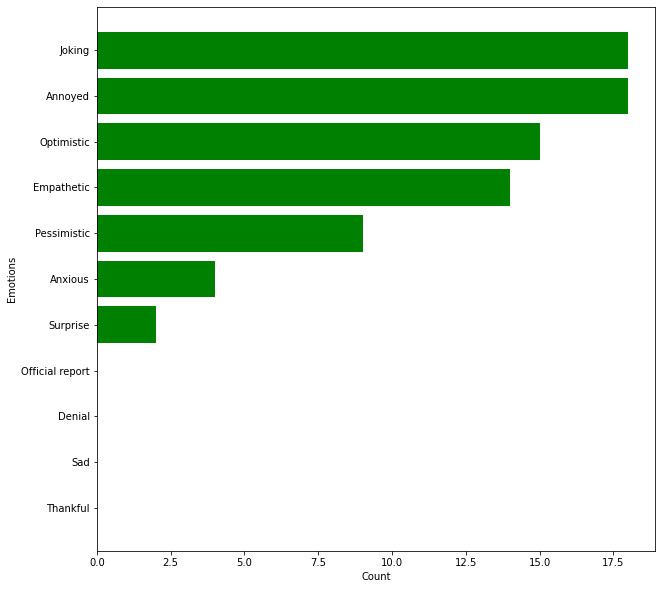

In [ ]:
emotions = list(chapter.columns[1:])
scores = [sum(chapter[x]) for x in emotions]
pairs = []

for i in range(len(emotions)):
    pairs.append((emotions[i], scores[i]))

pairs = sorted(pairs, key = lambda x : x[1], reverse = False)
emotions_sorted = []
scores_sorted = []

for pair in pairs:
    emotions_sorted.append(pair[0])
    scores_sorted.append(pair[1])

fig = plt.figure(figsize = (10, 10))
plt.barh(emotions_sorted, scores_sorted, color = 'green')
plt.ylabel("Emotions")
plt.xlabel("Count")

In [ ]:
rand_idx = np.random.randint(0, len(chapter))
print("Verse : ", chapter.iloc[rand_idx]['Verse'])
for e in emotions:
    print(e, ": ", chapter.iloc[rand_idx][e])

Verse :  but i say to you swear not at all neither by heaven for it is god s throne
Optimistic :  0.0
Thankful :  0.0
Empathetic :  0.0
Pessimistic :  1.0
Anxious :  0.0
Sad :  0.0
Annoyed :  1.0
Denial :  0.0
Official report :  0.0
Surprise :  0.0
Joking :  0.0


In [ ]:
only_emotes = chapter[emotions]
only_emotes

Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
0          0.0       0.0         0.0          0.0      0.0  0.0      0.0   
1          0.0       0.0         0.0          0.0      0.0  0.0      0.0   
2          0.0       0.0         1.0          0.0      0.0  0.0      0.0   
3          1.0       0.0         1.0          0.0      0.0  0.0      0.0   
4          1.0       0.0         1.0          0.0      0.0  0.0      0.0   
5          1.0       0.0         1.0          0.0      0.0  0.0      0.0   
6          0.0       0.0         1.0          0.0      0.0  0.0      0.0   
7          1.0       0.0         1.0          0.0      0.0  0.0      0.0   
8          1.0       0.0         1.0          0.0      0.0  0.0      0.0   
9          0.0       0.0         1.0          0.0      0.0  0.0      1.0   
10         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
11         1.0       0.0         1.0          0.0      0.0  0.0      0.0   
12         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
13         1.0       0.0         0.0          0.0      0.0  0.0      0.0   
14         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
15         1.0       0.0         1.0          0.0      0.0  0.0      0.0   
16         1.0       0.0         0.0          0.0      0.0  0.0      1.0   
17         1.0       0.0         0.0          1.0      1.0  0.0      0.0   
18         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
19         0.0       0.0         0.0          1.0      0.0  0.0      0.0   
20         0.0       0.0         0.0          1.0      1.0  0.0      0.0   
21         0.0       0.0         0.0          0.0      1.0  0.0      1.0   
22         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
23         1.0       0.0         1.0          0.0      0.0  0.0      0.0   
24         0.0       0.0         0.0          1.0      1.0  0.0      1.0   
25         0.0       0.0         0.0          1.0      0.0  0.0      0.0   
26         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
27         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
28         0.0       0.0         0.0          1.0      0.0  0.0      1.0   
29         0.0       0.0         0.0          1.0      0.0  0.0      1.0   
30         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
31         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
32         1.0       0.0         0.0          0.0      0.0  0.0      0.0   
33         0.0       0.0         0.0          1.0      0.0  0.0      1.0   
34         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
35         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
36         0.0       0.0         0.0          1.0      0.0  0.0      1.0   
37         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
38         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
39         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
40         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
41         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
42         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
43         1.0       0.0         1.0          0.0      0.0  0.0      0.0   
44         1.0       0.0         1.0          0.0      0.0  0.0      0.0   
45         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
46         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
47         1.0       0.0         1.0          0.0      0.0  0.0      0.0   

    Denial  Official report  Surprise  Joking  
0      0.0              0.0       0.0     0.0  
1      0.0              0.0       0.0     1.0  
2      0.0              0.0       0.0     0.0  
3      0.0              0.0       0.0     0.0  
4      0.0              0.0       0.0  

In [ ]:
only_emotes.iloc[0].tolist()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
emote_array = np.zeros((11, 11))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8,
    'Surprise' : 9, 'Joking' : 10
}
for i in range(len(only_emotes)):
    l = only_emotes.iloc[i].tolist()
    for j in range(11):
        if l[j] == 1:
            emote_array[j][j] += 1
        for k in range(j+1, 11):
            if (l[j] == 1) and (l[k] == 1):
                emote_array[j][k] += int(1)
                emote_array[k][j] += int(1)

In [ ]:
emote_df = pd.DataFrame(emote_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)
emote_df

Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
0           15         0          11            1        1    0        1   
1            0         0           0            0        0    0        0   
2           11         0          14            0        0    0        1   
3            1         0           0            9        3    0        5   
4            1         0           0            3        4    0        2   
5            0         0           0            0        0    0        0   
6            1         0           1            5        2    0       18   
7            0         0           0            0        0    0        0   
8            0         0           0            0        0    0        0   
9            0         0           0            1        0    0        0   
10           0         0           0            2        0    0       10   

    Denial  Official report  Surprise  Joking  
0        0                0         0       0  
1        0                0         0       0  
2        0                0         0       0  
3        0                0         1       2  
4        0                0         0       0  
5        0                0         0       0  
6        0                0         0      10  
7        0                0         0       0  
8        0                0         0       0  
9        0                0         2       1  
10       0                0         1      18

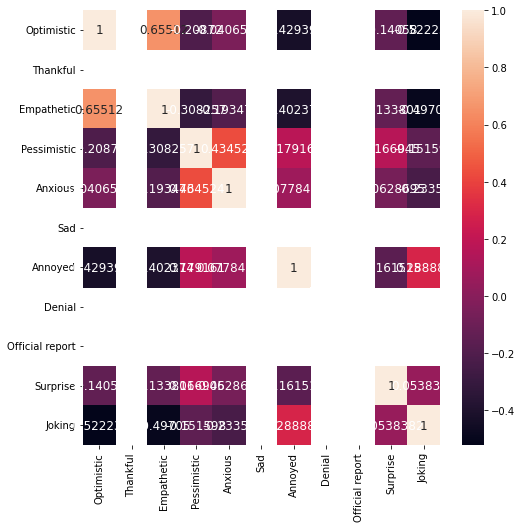

In [ ]:
fig = plt.figure(figsize = (8, 8))
sns.heatmap(only_emotes.corr(), annot = True, xticklabels = emote_df.columns, yticklabels = emote_df.columns, fmt = 'g', annot_kws = {"size" : 12})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


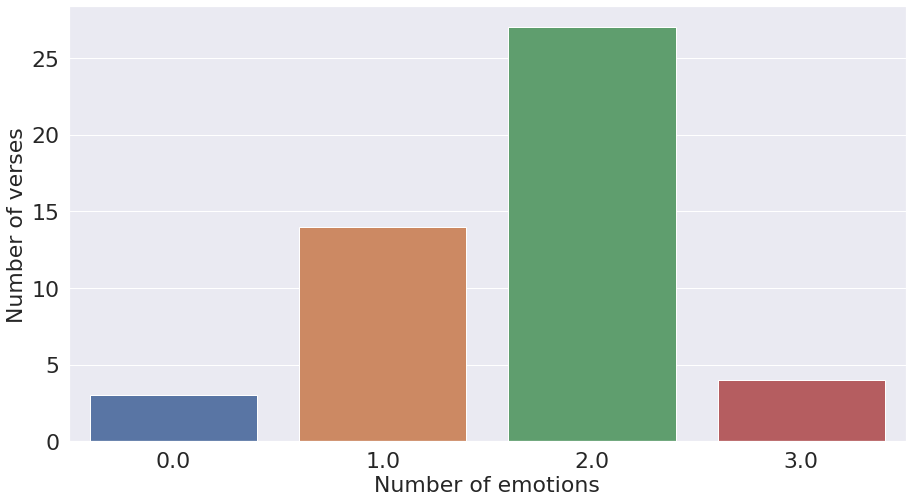

In [ ]:
chapter['n_emotions'] = chapter['Optimistic'] + chapter['Thankful'] + chapter['Empathetic'] + chapter['Pessimistic'] + chapter['Anxious'] + chapter['Sad'] + chapter['Annoyed'] + \
                        chapter['Official report'] + chapter['Surprise'] + chapter['Joking']
rowSums = chapter['n_emotions']
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize = (15, 8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, orient = 'v')

#plt.title("Tweets having multiple labels")
plt.ylabel('Number of verses', fontsize = 22)
plt.xlabel('Number of emotions', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
multiLabel_counts

2.0    27
1.0    14
3.0     4
0.0     3
Name: n_emotions, dtype: int64

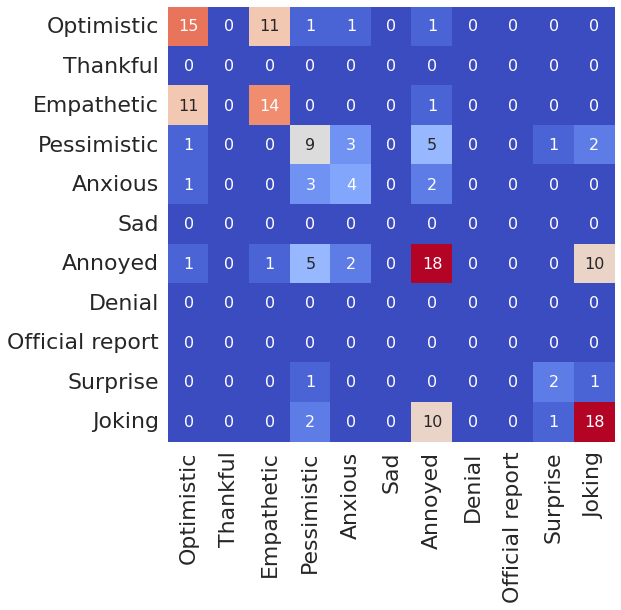

In [ ]:
fig = plt.figure(figsize = (8,8))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

## WordClouds

### Optimism

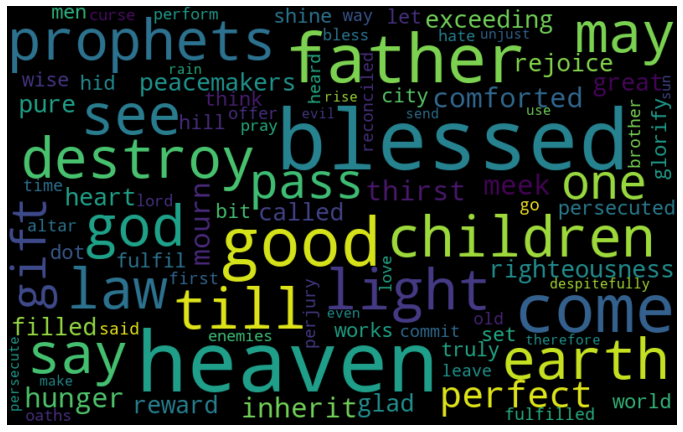

In [ ]:
optimisticWords = " ".join([word for word in chapter['Verse'][chapter['Optimistic'] == 1]])
if(len(optimisticWords)!=0):
  wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(optimisticWords)
  plt.figure(figsize = (12, 8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()
else:
  print("Sorry, no words found!!")

### Thankful

In [ ]:
thankfulWords = " ".join([word for word in chapter['Verse'][chapter['Thankful'] == 1]])
if(len(thankfulWords)!=0):
  wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(thankfulWords)
  plt.figure(figsize = (12, 8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()
else:
  print("Sorry, no words found!!")

Sorry, no words found!!


### Empathy

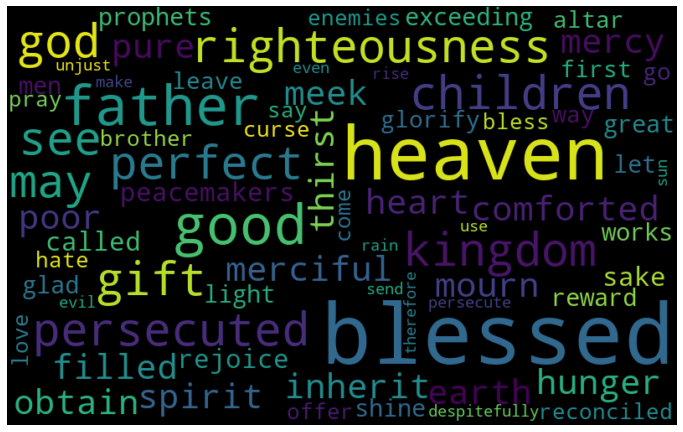

In [ ]:
empatheticWords = " ".join([word for word in chapter['Verse'][chapter['Empathetic'] == 1]])
if(len(empatheticWords)!=0):
  wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(empatheticWords)
  plt.figure(figsize = (12, 8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()
else:
  print("Sorry, no words found!!")

### Anxiety

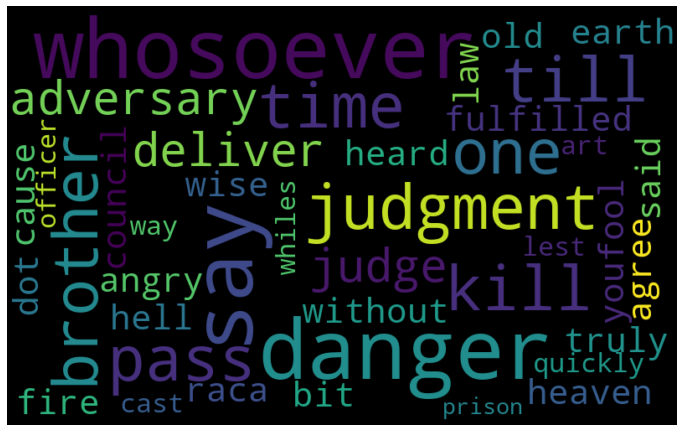

In [ ]:
anxiousWords = " ".join([word for word in chapter['Verse'][chapter['Anxious'] == 1]])
if(len(anxiousWords)!=0):
  wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(anxiousWords)
  plt.figure(figsize = (12, 8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()
else:
  print("Sorry, no words found!!")

### Sad

In [ ]:
sadWords = " ".join([word for word in chapter['Verse'][chapter['Sad'] == 1]])
if(len(sadWords)!=0):
  wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(sadWords)
  plt.figure(figsize = (12, 8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()
else:
  print("Sorry, no words found!!")

Sorry, no words found!!


### Official Report

In [ ]:
ORWords = " ".join([word for word in chapter['Verse'][chapter['Official report'] == 1]])
if(len(ORWords)!=0):
  wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(ORWords)
  plt.figure(figsize = (12, 8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()
else:
  print("Sorry, no words found!!")

Sorry, no words found!!


### Joking

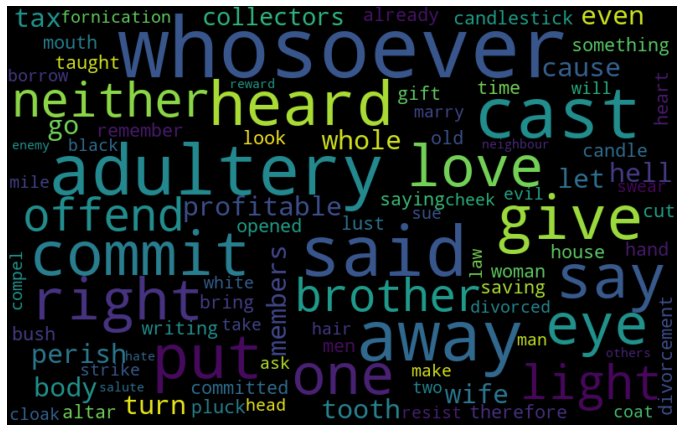

In [ ]:
JokingWords = " ".join([word for word in chapter['Verse'][chapter['Joking'] == 1]])
if(len(JokingWords)!=0):
  wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(JokingWords)
  plt.figure(figsize = (12, 8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()
else:
  print("Sorry, no words found!!")

## Cleaning followed by Unigram and Bigram Analyses

In [ ]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

In [ ]:
import re
words = clean(''.join(str(chapter['Verse'].tolist())))

In [ ]:
words[:20]

['seeing',
 'crowd',
 'went',
 'mountain',
 'set',
 'disciple',
 'came',
 'opened',
 'mouth',
 'taught',
 'saying',
 'blessed',
 'poor',
 'spirit',
 'kingdom',
 'heaven',
 'blessed',
 'mourn',
 'shall',
 'comforted']

## N-gram Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

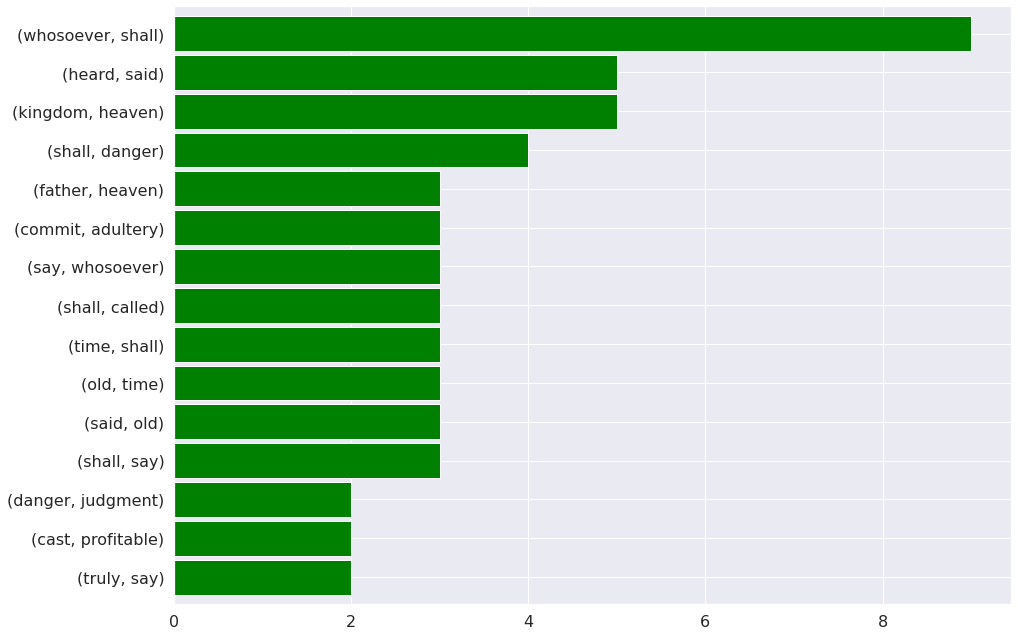

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'green', width = 0.9, figsize = (15, 11))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

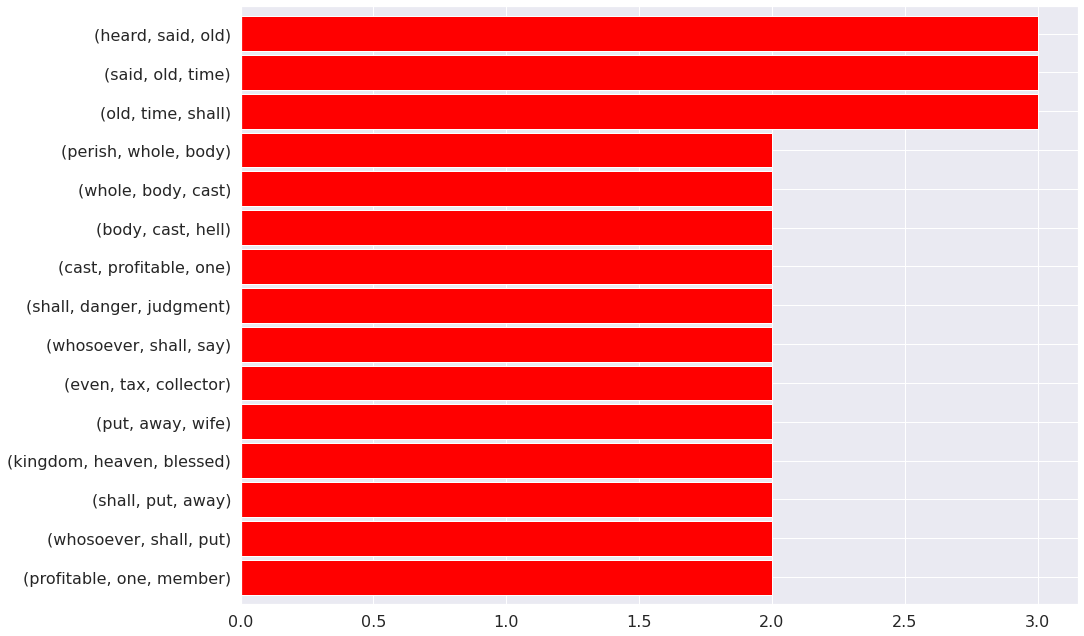

In [ ]:
trigrams_series.sort_values().plot.barh(color = 'red', width = 0.9, figsize = (15, 11))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

## Chapter-wise Word Count ##

In [ ]:
kjv_wordCount = []
niv_wordCount = []
nrsv_wordCount = []

for i in range(5,8):
  chapter = "/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/Chapter-" + str(i) +".txt"
  df = open(chapter, "r")
  data = df.read()
  data = re.sub('[^a-zA-Z\n\.]', ' ', data)
  words = data.split()
  kjv_wordCount.append(len(words))

for i in range(5,8):
  chapter = "/content/drive/MyDrive/UNSW/Sermon On The Mount/New International Version/Chapter-" + str(i) +".txt"
  df = open(chapter, "r")
  data = df.read()
  data = re.sub('[^a-zA-Z\n\.]', ' ', data)
  words = data.split()
  niv_wordCount.append(len(words))

for i in range(5,8):
  chapter = "/content/drive/MyDrive/UNSW/Sermon On The Mount/New Revised Standard Version/Chapter-" + str(i) +".txt"
  df = open(chapter, "r")
  data = df.read()
  data = re.sub('[^a-zA-Z\n\.]', ' ', data)
  words = data.split()
  nrsv_wordCount.append(len(words))

In [ ]:
kjv_wordCount

[1082, 794, 629]

In [ ]:
niv_wordCount

[1073, 781, 630]

In [ ]:
nrsv_wordCount

[1069, 793, 623]

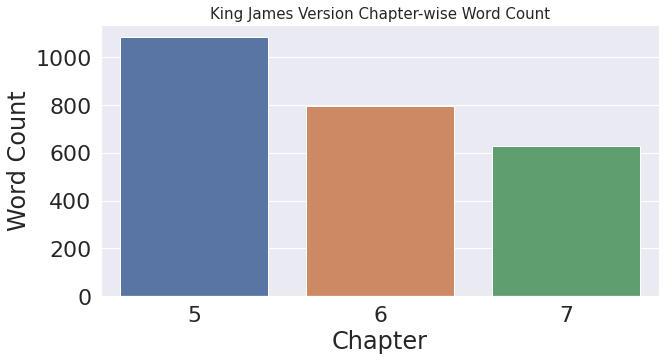

In [ ]:
plt.figure(figsize=(10,5))
p6=sns.barplot(x = [5, 6, 7], y = kjv_wordCount, label='Word Count')
p6.set_xlabel("Chapter")
p6.set_ylabel("Word Count")
plt.title("King James Version Chapter-wise Word Count", fontSize = 15)

plt.show()

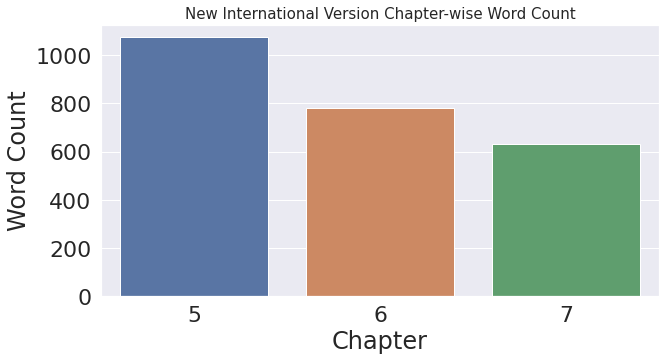

In [ ]:
plt.figure(figsize=(10,5))

p6=sns.barplot(x = [5, 6, 7], y = niv_wordCount, label='Word Count')
p6.set_xlabel("Chapter")
p6.set_ylabel("Word Count")
plt.title("New International Version Chapter-wise Word Count", fontSize = 15)


plt.show()

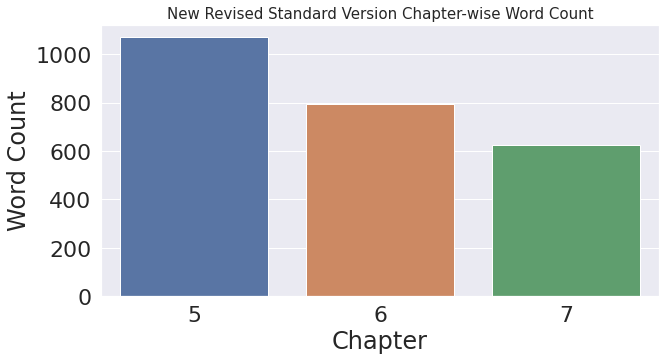

In [ ]:
plt.figure(figsize=(10,5))
p6=sns.barplot(x = [5, 6, 7], y = nrsv_wordCount, label='Word Count')
p6.set_xlabel("Chapter")
p6.set_ylabel("Word Count")
plt.title("New Revised Standard Version Chapter-wise Word Count", fontSize = 15)

plt.show()

## Bigrams - Trigrams ##

In [ ]:
import gensim
from gensim import utils
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
topic_df = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_5.csv")
topic_df = topic_df.drop(['Official report'], axis = 1)
for chapter in range(6, 8):
  df = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_" + str(chapter) + ".csv")
  df = df.drop(['Official report'], axis = 1)
  topic_df = pd.concat([topic_df, df], axis=0)

In [ ]:
topic_df2 = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/New International Version/bert_NIV_chapter_5.csv")
topic_df2 = topic_df2.drop(['Official report'], axis = 1)

for chapter in range(6, 8):
  df = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/New International Version/bert_NIV_chapter_" + str(chapter) + ".csv")
  df = df.drop(['Official report'], axis = 1)
  topic_df2 = pd.concat([topic_df2, df], axis=0)

In [ ]:
topic_df3 = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/New Revised Standard Version/bert_NRSV_chapter_5.csv")
topic_df3 = topic_df3.drop(['Official report'], axis = 1)

for chapter in range(6, 8):
  df = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/New Revised Standard Version/bert_NRSV_chapter_" + str(chapter) + ".csv")
  df = df.drop(['Official report'], axis = 1)
  topic_df3 = pd.concat([topic_df3, df], axis=0)

In [ ]:
# Preprocessing functions

# Stopwords
stop_words = stopwords.words('english')
newStopWords = ["replied", "asked", "shall", "lord", "said"]
stop_words.extend(newStopWords)

def remove_stopwords(verses):
    return [[word for word in gensim.utils.simple_preprocess(str(verse)) if word not in stop_words] for verse in verses]

def tokenize(verse):
    for word in verse:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))


def preprocessing(df):

  df['Verse'] = df['Verse'].str.lower()                                                      # Convert to lowercase
  df['Verse'] = df['Verse'].str.replace("[^a-zA-Z#]", " ")                                   # Remove punctuations
  df['Verse'] = df['Verse'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))     # Remove short words
  df['Verse tokens'] = list(tokenize(df['Verse']))
  df['tokens_no_stop'] = remove_stopwords(df['Verse'])
  df['tokens_no_stop_joined'] = df['Verse'].apply(lambda x: ' '.join([word for word in x.split(' ') if word not in stop_words]))
  return df

def retrieve_text(df):
  doc = '. '.join(df['tokens_no_stop_joined'])
  return doc

def ngrams_series_func(data, n):
  
  wordList = re.sub("[^\w]", " ",  data).split()
  ngrams_series = (pd.Series(nltk.ngrams(wordList, n)).value_counts())[:10]
  return ngrams_series

In [ ]:
# Visualization functions

from matplotlib import cm, dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}
heatmap1_args = dict(annot=True, fmt='.0f', square=False, cmap=cm.get_cmap("RdGy", 10), center = 90, vmin=0, vmax=10000, lw=4, cbar=False)
heatmap2_args = dict(annot=True, fmt='.3f', square=False, cmap="Greens", center = 0.5, lw=4, cbar=False)
heatmap3_args = dict(annot=True, fmt='.0f', square=False, cmap=cmap, center = 9200, lw=4, cbar=False)

def hide_axes(this_ax):
    this_ax.set_frame_on(False)
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    return this_ax

def draw_heatmap1(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap1_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def draw_heatmap2(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap2_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def draw_heatmap3(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap3_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def thousands1(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

formatterK1 = FuncFormatter(thousands1)

def thousands2(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

formatterK2 = FuncFormatter(thousands2)

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
topic_df = preprocessing(topic_df)
topic_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.


Verse  Optimistic  Thankful  \
0   seeing crowd went into mountain when disciples...         0.0       0.0   
1                     opened mouth taught them saying         0.0       0.0   
2           blessed poor spirit theirs kingdom heaven         0.0       0.0   
3        blessed they that mourn they shall comforted         1.0       0.0   
4               blessed meek they shall inherit earth         1.0       0.0   
..                                                ...         ...       ...   
24  rain descended floods came winds blew beat upo...         0.0       0.0   
25  every that hears these sayings mine does them ...         0.0       0.0   
26  rain descended floods came winds blew beat upo...         0.0       0.0   
27  came pass when jesus ended these sayings peopl...         0.0       0.0   
28               taught them having authority scribes         0.0       0.0   

    Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  Surprise  Joking  \
0          0.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
1          0.0          0.0      0.0  0.0      0.0     0.0       0.0     1.0   
2          1.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
3          1.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
4          1.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
..         ...          ...      ...  ...      ...     ...       ...     ...   
24         0.0          1.0      0.0  1.0      0.0     0.0       0.0     0.0   
25         0.0          1.0      0.0  0.0      1.0     0.0       0.0     1.0   
26         0.0          1.0      0.0  0.0      0.0     0.0       0.0     0.0   
27         0.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
28         0.0          0.0      0.0  0.0      1.0     0.0       1.0     0.0   

                                         Verse tokens  \
0   [seeing, crowd, went, into, mountain, when, di...   
1               [opened, mouth, taught, them, saying]   
2    [blessed, poor, spirit, theirs, kingdom, heaven]   
3   [blessed, they, that, mourn, they, shall, comf...   
4        [blessed, meek, they, shall, inherit, earth]   
..                                                ...   
24  [rain, descended, floods, came, winds, blew, b...   
25  [every, that, hears, these, sayings, mine, doe...   
26  [rain, descended, floods, came, winds, blew, b...   
27  [came, pass, when, jesus, ended, these, saying...   
28         [taught, them, having, authority, scribes]   

                                       tokens_no_stop  \
0    [seeing, crowd, went, mountain, disciples, came]   
1                     [opened, mouth, taught, saying]   
2            [blessed, poor, spirit, kingdom, heaven]   
3                         [blessed, mourn, comforted]   
4                     [blessed, meek, inherit, earth]   
..                                                ...   
24  [rain, descended, floods, came, winds, blew, b...   
25  [every, hears, sayings, mine, like, foolish, b...   
26  [rain, descended, floods, came, winds, blew, b...   
27  [came, pass, jesus, ended, sayings, people, as...   
28                       [taught, authority, scribes]   

                                tokens_no_stop_joined  
0           seeing crowd went mountain disciples came  
1                          opened mouth taught saying  
2                  blessed poor spirit kingdom heaven  
3                             blessed mourn comforted  
4                          blessed meek inherit earth  
..                                                ...  
24  rain descended floods came winds blew beat upo...  
25  every hears sayings mine like foolish built ho...  
26  rain descended floods came winds blew beat upo...  
27  came pass jesus ended sayings people astonishe...  
28                           taught authority scribes  

[111 rows x 14 columns]

In [ ]:
topic_df2 = preprocessing(topic_df2)
topic_df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.


Verse  Optimistic  Thankful  \
0   when jesus crowds went mountainside down disci...         0.0       0.0   
1                               began teach them said         0.0       0.0   
2           blessed poor spirit theirs kingdom heaven         0.0       0.0   
3             blessed those mourn they will comforted         1.0       0.0   
4                blessed meek they will inherit earth         1.0       0.0   
..                                                ...         ...       ...   
24  rain came down streams rose winds blew beat ag...         0.0       0.0   
25  everyone hears these words mine does them into...         0.0       0.0   
26  rain came down streams rose winds blew beat ag...         0.0       0.0   
27  when jesus finished saying these things crowds...         0.0       0.0   
28            because taught authority their teachers         0.0       0.0   

    Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  Surprise  Joking  \
0          0.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
1          0.0          0.0      0.0  0.0      0.0     0.0       0.0     1.0   
2          1.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
3          1.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
4          1.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
..         ...          ...      ...  ...      ...     ...       ...     ...   
24         0.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
25         0.0          0.0      0.0  0.0      1.0     0.0       0.0     1.0   
26         0.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
27         0.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
28         0.0          0.0      0.0  0.0      1.0     0.0       1.0     0.0   

                                         Verse tokens  \
0   [when, jesus, crowds, went, mountainside, down...   
1                          [began, teach, them, said]   
2    [blessed, poor, spirit, theirs, kingdom, heaven]   
3      [blessed, those, mourn, they, will, comforted]   
4         [blessed, meek, they, will, inherit, earth]   
..                                                ...   
24  [rain, came, down, streams, rose, winds, blew,...   
25  [everyone, hears, these, words, mine, does, th...   
26  [rain, came, down, streams, rose, winds, blew,...   
27  [when, jesus, finished, saying, these, things,...   
28      [because, taught, authority, their, teachers]   

                                       tokens_no_stop  \
0   [jesus, crowds, went, mountainside, disciples,...   
1                                      [began, teach]   
2            [blessed, poor, spirit, kingdom, heaven]   
3                         [blessed, mourn, comforted]   
4                     [blessed, meek, inherit, earth]   
..                                                ...   
24  [rain, came, streams, rose, winds, blew, beat,...   
25  [everyone, hears, words, mine, practice, like,...   
26  [rain, came, streams, rose, winds, blew, beat,...   
27  [jesus, finished, saying, things, crowds, amaz...   
28                      [taught, authority, teachers]   

                                tokens_no_stop_joined  
0       jesus crowds went mountainside disciples came  
1                                         began teach  
2                  blessed poor spirit kingdom heaven  
3                             blessed mourn comforted  
4                          blessed meek inherit earth  
..                                                ...  
24  rain came streams rose winds blew beat house f...  
25  everyone hears words mine practice like foolis...  
26  rain came streams rose winds blew beat house f...  
27  jesus finished saying things crowds amazed tea...  
28                          taught authority teachers  

[111 rows x 14 columns]

In [ ]:
topic_df3 = preprocessing(topic_df3)
topic_df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.


Verse  Optimistic  Thankful  \
0   when jesus crowds went mountain after down dis...         0.0       0.0   
1                 then began speak taught them saying         0.0       0.0   
2           blessed poor spirit theirs kingdom heaven         0.0       0.0   
3             blessed those mourn they will comforted         1.0       0.0   
4                blessed meek they will inherit earth         1.0       0.0   
..                                                ...         ...       ...   
24  rain fell floods came winds blew beat that hou...         0.0       0.0   
25  everyone hears these words mine does them will...         0.0       0.0   
26  rain fell floods came winds blew beat against ...         0.0       0.0   
27  when jesus finished saying these things crowds...         0.0       0.0   
28         taught them having authority their scribes         0.0       0.0   

    Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  Surprise  Joking  \
0          0.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
1          0.0          0.0      0.0  0.0      0.0     0.0       0.0     1.0   
2          1.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
3          1.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
4          1.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
..         ...          ...      ...  ...      ...     ...       ...     ...   
24         0.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
25         0.0          0.0      0.0  0.0      1.0     0.0       0.0     1.0   
26         0.0          1.0      0.0  0.0      0.0     0.0       0.0     0.0   
27         0.0          0.0      0.0  0.0      1.0     0.0       1.0     0.0   
28         0.0          0.0      0.0  0.0      1.0     0.0       1.0     0.0   

                                         Verse tokens  \
0   [when, jesus, crowds, went, mountain, after, d...   
1          [then, began, speak, taught, them, saying]   
2    [blessed, poor, spirit, theirs, kingdom, heaven]   
3      [blessed, those, mourn, they, will, comforted]   
4         [blessed, meek, they, will, inherit, earth]   
..                                                ...   
24  [rain, fell, floods, came, winds, blew, beat, ...   
25  [everyone, hears, these, words, mine, does, th...   
26  [rain, fell, floods, came, winds, blew, beat, ...   
27  [when, jesus, finished, saying, these, things,...   
28  [taught, them, having, authority, their, scribes]   

                                       tokens_no_stop  \
0    [jesus, crowds, went, mountain, disciples, came]   
1                      [began, speak, taught, saying]   
2            [blessed, poor, spirit, kingdom, heaven]   
3                         [blessed, mourn, comforted]   
4                     [blessed, meek, inherit, earth]   
..                                                ...   
24  [rain, fell, floods, came, winds, blew, beat, ...   
25  [everyone, hears, words, mine, like, foolish, ...   
26  [rain, fell, floods, came, winds, blew, beat, ...   
27  [jesus, finished, saying, things, crowds, asto...   
28                       [taught, authority, scribes]   

                                tokens_no_stop_joined  
0           jesus crowds went mountain disciples came  
1                           began speak taught saying  
2                  blessed poor spirit kingdom heaven  
3                             blessed mourn comforted  
4                          blessed meek inherit earth  
..                                                ...  
24  rain fell floods came winds blew beat house fa...  
25  everyone hears words mine like foolish built h...  
26  rain fell floods came winds blew beat house fe...  
27  jesus finished saying things crowds astounded ...  
28                           taught authority scribes  

[111 rows x 14 columns]

In [ ]:
text = retrieve_text(topic_df)
text2 = retrieve_text(topic_df2)
text3 = retrieve_text(topic_df3)
print(text2)

jesus crowds went mountainside disciples came. began teach. blessed poor spirit kingdom heaven. blessed mourn comforted. blessed meek inherit earth. blessed hunger thirst righteousness filled. blessed merciful shown mercy. blessed pure heart. blessed peacemakers called children. blessed persecuted righteousness kingdom heaven. blessed people insult persecute falsely kinds evil. rejoice glad great reward heaven persecuted prophets. salt earth salt loses saltiness made salty longer good anything except thrown trampled underfoot. light world town built hill cannot hidden. neither people light lamp bowl instead stand gives light everyone house. light shine others good deeds glorify father heaven. think come abolish prophets come abolish fulfill. truly tell heaven earth disappear smallest letter least stroke means disappear everything accomplished. therefore anyone sets aside least commands teaches others accordingly called least kingdom heaven whoever practices teaches commands called grea

In [ ]:
ticks = [2,4,6,8]

allWords1 = nltk.tokenize.word_tokenize(text)
allWordDist1 = nltk.FreqDist(w.lower() for w in allWords1)
mostCommon1 = allWordDist1.most_common(20)
bigram1 = ngrams_series_func(text, 2)
trigram1 = ngrams_series_func(text, 3)


allWords2 = nltk.tokenize.word_tokenize(text2)
allWordDist2 = nltk.FreqDist(w.lower() for w in allWords2)
mostCommon2 = allWordDist2.most_common(20)
bigram2 = ngrams_series_func(text2, 2)
trigram2 = ngrams_series_func(text2, 3)

allWords3 = nltk.tokenize.word_tokenize(text3)
allWordDist3 = nltk.FreqDist(w.lower() for w in allWords3)
mostCommon3= allWordDist3.most_common(20)
bigram3 = ngrams_series_func(text3, 2)
trigram3 = ngrams_series_func(text3, 3)

ngram1 = pd.concat([bigram1, trigram1])
ngram2 = pd.concat([bigram2, trigram2])
ngram3 = pd.concat([bigram3, trigram3])


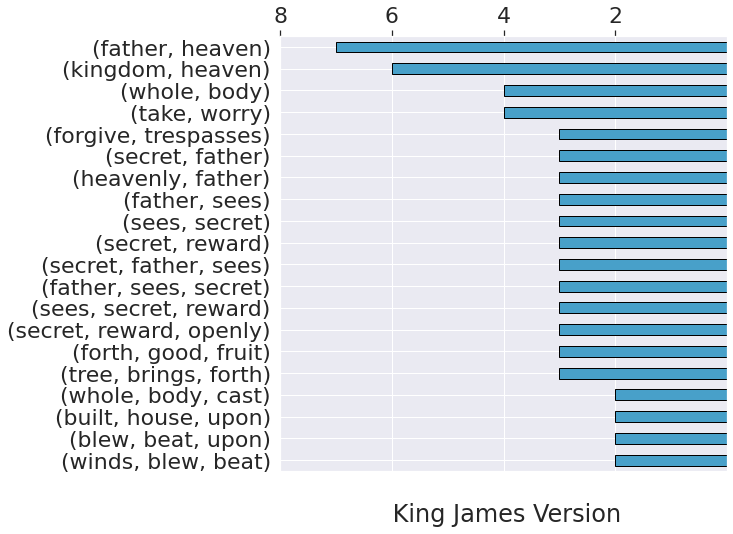

In [ ]:
plt.rcParams.update({'font.size': 14})
fig, ax=plt.subplots(1,1, figsize=(8,8))
barh_ax = ax

ngram1[::-1].plot.barh(color=barcolors[3],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n King James Version')
barh_ax.set_ylabel('',fontsize=50)
barh_ax.set_xticks(ticks, minor=False)

plt.show()


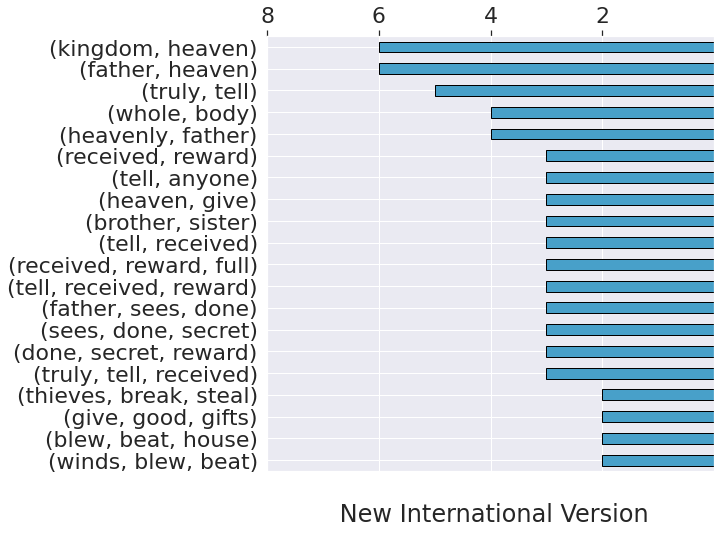

In [ ]:
plt.rcParams.update({'font.size': 14})
fig, ax=plt.subplots(1,1, figsize=(8,8))
barh_ax = ax

ngram2[::-1].plot.barh(color=barcolors[3],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n New International Version')
barh_ax.set_ylabel('',fontsize=50)
barh_ax.set_xticks(ticks, minor=False)

plt.show()

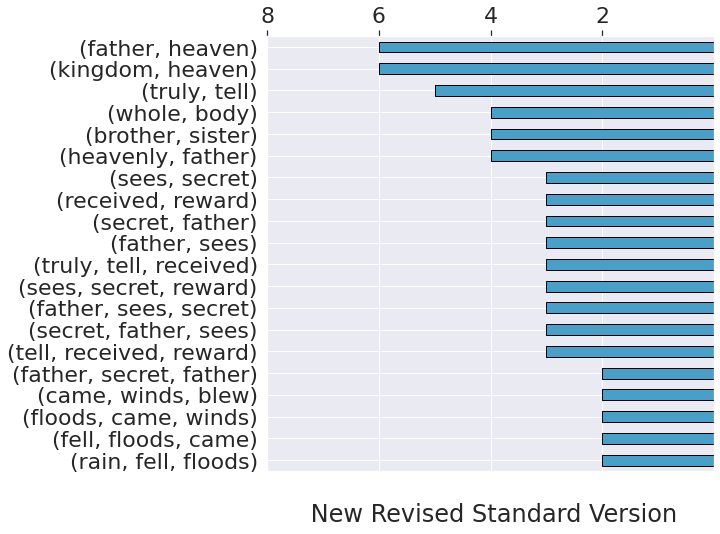

In [ ]:
plt.rcParams.update({'font.size': 14})
fig, ax=plt.subplots(1,1, figsize=(8,8))
barh_ax = ax

ngram3[::-1].plot.barh(color=barcolors[3],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n New Revised Standard Version')
barh_ax.set_ylabel('',fontsize=50)
barh_ax.set_xticks(ticks, minor=False)

plt.show()

## Top Optimistic and Pessimistic bigrams-trigrams ##

In [ ]:
topic_df = pd.read_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_5.csv')
topic_df = topic_df.drop(['Official report'], axis = 1)

for chapter in range(6, 8):
  df = pd.read_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_' + str(chapter) + ".csv")
  df = df.drop(['Official report'], axis = 1)
  topic_df = pd.concat([topic_df, df], axis=0)

In [ ]:
topic_df = preprocessing(topic_df)
topic_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.


Verse  Optimistic  Thankful  \
0   seeing crowd went into mountain when disciples...         0.0       0.0   
1                     opened mouth taught them saying         0.0       0.0   
2           blessed poor spirit theirs kingdom heaven         0.0       0.0   
3        blessed they that mourn they shall comforted         1.0       0.0   
4               blessed meek they shall inherit earth         1.0       0.0   
..                                                ...         ...       ...   
24  rain descended floods came winds blew beat upo...         0.0       0.0   
25  every that hears these sayings mine does them ...         0.0       0.0   
26  rain descended floods came winds blew beat upo...         0.0       0.0   
27  came pass when jesus ended these sayings peopl...         0.0       0.0   
28               taught them having authority scribes         0.0       0.0   

    Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  Surprise  Joking  \
0          0.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
1          0.0          0.0      0.0  0.0      0.0     0.0       0.0     1.0   
2          1.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
3          1.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
4          1.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
..         ...          ...      ...  ...      ...     ...       ...     ...   
24         0.0          1.0      0.0  1.0      0.0     0.0       0.0     0.0   
25         0.0          1.0      0.0  0.0      1.0     0.0       0.0     1.0   
26         0.0          1.0      0.0  0.0      0.0     0.0       0.0     0.0   
27         0.0          0.0      0.0  0.0      0.0     0.0       0.0     0.0   
28         0.0          0.0      0.0  0.0      1.0     0.0       1.0     0.0   

                                         Verse tokens  \
0   [seeing, crowd, went, into, mountain, when, di...   
1               [opened, mouth, taught, them, saying]   
2    [blessed, poor, spirit, theirs, kingdom, heaven]   
3   [blessed, they, that, mourn, they, shall, comf...   
4        [blessed, meek, they, shall, inherit, earth]   
..                                                ...   
24  [rain, descended, floods, came, winds, blew, b...   
25  [every, that, hears, these, sayings, mine, doe...   
26  [rain, descended, floods, came, winds, blew, b...   
27  [came, pass, when, jesus, ended, these, saying...   
28         [taught, them, having, authority, scribes]   

                                       tokens_no_stop  \
0    [seeing, crowd, went, mountain, disciples, came]   
1                     [opened, mouth, taught, saying]   
2            [blessed, poor, spirit, kingdom, heaven]   
3                         [blessed, mourn, comforted]   
4                     [blessed, meek, inherit, earth]   
..                                                ...   
24  [rain, descended, floods, came, winds, blew, b...   
25  [every, hears, sayings, mine, like, foolish, b...   
26  [rain, descended, floods, came, winds, blew, b...   
27  [came, pass, jesus, ended, sayings, people, as...   
28                       [taught, authority, scribes]   

                                tokens_no_stop_joined  
0           seeing crowd went mountain disciples came  
1                          opened mouth taught saying  
2                  blessed poor spirit kingdom heaven  
3                             blessed mourn comforted  
4                          blessed meek inherit earth  
..                                                ...  
24  rain descended floods came winds blew beat upo...  
25  every hears sayings mine like foolish built ho...  
26  rain descended floods came winds blew beat upo...  
27  came pass jesus ended sayings people astonishe...  
28                           taught authority scribes  

[111 rows x 14 columns]

In [ ]:
df_optimistic = topic_df[topic_df['Optimistic'] == 1]
df_pessimistic = topic_df[topic_df['Pessimistic'] == 1]
df_surprise = topic_df[topic_df['Surprise'] == 1]
df_denial = topic_df[topic_df['Denial'] == 1]
df_annoyed = topic_df[topic_df['Annoyed'] == 1]
df_thankful = topic_df[topic_df['Thankful'] == 1]
df_empathetic = topic_df[topic_df['Empathetic'] == 1]
df_anxious = topic_df[topic_df['Anxious'] == 1]
df_sad =  topic_df[topic_df['Sad'] == 1]
# df_officialReport =  topic_df[topic_df['Official report'] == 1]
df_joking = topic_df[topic_df['Joking'] == 1]

In [ ]:
text_optimistic = '. '.join(df_optimistic.tokens_no_stop_joined)
text_pessimistic = '. '.join(df_pessimistic.tokens_no_stop_joined)
text_surprise = '. '.join(df_surprise.tokens_no_stop_joined)
text_denial = '. '.join(df_denial.tokens_no_stop_joined)
text_annoyed = '. '.join(df_annoyed.tokens_no_stop_joined)
text_thankful = '. '.join(df_thankful.tokens_no_stop_joined)
text_empathetic = '. '.join(df_empathetic.tokens_no_stop_joined)
text_anxious = '. '.join(df_anxious.tokens_no_stop_joined)
text_sad = '. '.join(df_sad.tokens_no_stop_joined)
# text_officialReport = '. '.join(df_officialReport.tokens_no_stop_joined)
text_joking = '. '.join(df_joking.tokens_no_stop_joined)

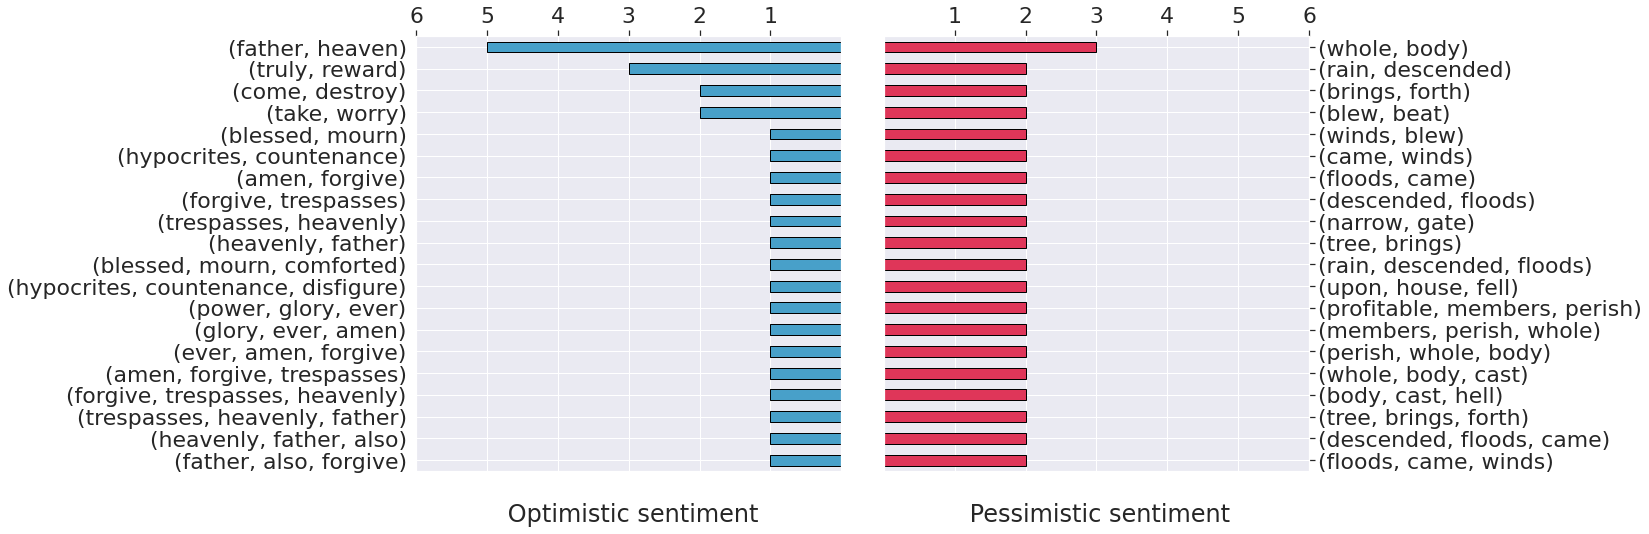

In [ ]:
bigram1 = ngrams_series_func(text_optimistic, 2)
trigram1 = ngrams_series_func(text_optimistic, 3)

ticks = [1,2,3,4,5,6]

bigram2 = ngrams_series_func(text_pessimistic, 2)
trigram2 = ngrams_series_func(text_pessimistic, 3)

ngram1 = pd.concat([bigram1, trigram1])
ngram2 = pd.concat([bigram2, trigram2])

plt.rcParams.update({'font.size': 14})
fig, ax=plt.subplots(1,2, figsize=(16,8), gridspec_kw = {'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
ngram1[::-1].plot.barh(ax=barh_ax, color=barcolors[3],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
# barh_ax.xaxis.set_major_formatter(formatterK2)
# barh_ax.set_xlim([0, 1200])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n Optimistic sentiment')
barh_ax.set_ylabel('',fontsize=50)
barh_ax.set_xticks(ticks, minor=False)

barh_ax = ax[1]
ngram2[::-1].plot.barh(ax=barh_ax, color=barcolors[6],**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
# barh_ax.xaxis.set_major_formatter(formatterK2)
# barh_ax.set_xlim([0, 1200])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
# barh_ax.set_xlabel('Tri N-gram Count - Trump Dataset', fontsize=13)
barh_ax.set_ylabel('', fontsize=50)
barh_ax.set_xlabel('\n Pessimistic sentiment')
barh_ax.set_xticks([1,2,3,4,5,6], minor=False)
plt.show()

## Variation of Jesus's Sentiments through the text ##

In [ ]:
sentiment_polarity = {
    'Surprise': 0,
    'Joking': 0,
    # 'Official Report': 0,
    'Pessimistic': -1,
    'Anxious': -1,
    'Sad':  -1,
    'Annoyed': -1,
    'Denial': -1,
    'Optimistic': 1,
    'Thankful': 1,
    'Empathetic': 1
}

In [ ]:
!pip install chart_studio
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plotly to create interactive graph
import chart_studio.plotly as py
from plotly import tools
# import plotly.figure_factory as ff
import plotly.graph_objs as go

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=d1b9faad6564d08687e5af69eced1a1934b78c270c22f48bbfcde09c829026cf
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import chart_studio.plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=False)
import plotly.graph_objs as go

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# To remove un-necessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
polarity = 0
count = 0

polarity_array = []
chapter = 1
df_sentiments = pd.DataFrame(columns=['Chapter', 'Polarity'])

for chapter in range(5,8):

  kjv_chapter = pd.read_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_' + str(chapter) + ".csv")

  polarity = 0
  for verse in range(len(kjv_chapter)):
    df1 = kjv_chapter.iloc[verse, :]
    if df1['Optimistic'] == 1 :
      count+=1
      polarity+=1

    if df1['Thankful'] == 1 :
      count+=1
      polarity+=1

    if df1['Empathetic'] == 1 :
      count+=1
      polarity+=1

    if df1['Denial'] == 1 :
      count+=1
      polarity -= 1

    if df1['Annoyed'] == 1 :
      count+=1
      polarity -= 1

    if df1['Sad'] == 1 :
      count+=1
      polarity -= 1

    if df1['Anxious'] == 1 :
      count+=1
      polarity -= 1

    if df1['Pessimistic'] == 1 :
      count+=1
      polarity -= 1

    if df1['Joking'] == 1 :
      #count+=1
      polarity+=0

    if df1['Surprise'] == 1 :
      #count+=1
      polarity+=0
    
    # if df1['Official report'] == 1 :
    #   #count+=1
    #   polarity+=0

  df_temp = pd.DataFrame([[chapter, polarity]], columns = ['Chapter', 'Polarity'])
  df_sentiments = pd.concat([df_temp, df_sentiments], axis=0, ignore_index = True)
  chapter+=1

df_sentiments = df_sentiments.sort_values('Chapter')

df_sentiments.reset_index()
df_sentiments.set_index('Chapter')

Polarity
Chapter         
5             -2
6             21
7            -18

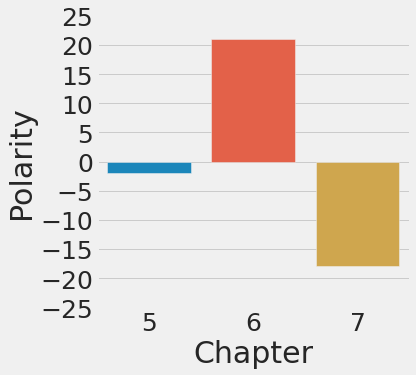

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(5,5))
p6=sns.barplot(x = df_sentiments['Chapter'], y = df_sentiments['Polarity'], label='Jesus\'s Sentiments')
p6.set_xlabel("Verses Where Jesus Speaks")

plt.ylabel('Polarity', fontsize=30)
plt.xlabel('Chapter', fontsize=30)

# plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))    # format decimals on the y-axis
plt.yticks(np.arange(-25, 30, step=5), fontsize= 25)
plt.xticks(np.arange(0, 3, step=1), fontsize = 25)

plt.show()

## Sentence Embedding Visualizations

In [ ]:
!pip install datashader
!pip install bokeh
!pip install holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 5.3 MB/s 
     |████████████████████████████████| 76 kB 6.8 MB/s 
     |████████████████████████████████| 140 kB 68.3 MB/s 
     |████████████████████████████████| 837 kB 55.5 MB/s 
     |████████████████████████████████| 830 kB 64.1 MB/s 
     |████████████████████████████████| 822 kB 76.2 MB/s 
     |████████████████████████████████| 802 kB 78.9 MB/s 
     |████████████████████████████████| 802 kB 69.8 MB/s 
     |████████████████████████████████| 793 kB 21.4 MB/s 
     |████████████████████████████████| 793 kB 72.2 MB/s 
     |████████████████████████████████| 791 kB 68.5 MB/s 
     |████████████████████████████████| 786 kB 69.7 MB/s 
     |████████████████████████████████| 779 kB 68.2 MB/s 
     |████████████████████████████████| 778 kB 77.9 MB/s 
     |████████████████████████████████| 776 kB 68.1 MB/s 
     |███████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 50.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=207d24be5f93b56ddad82816ab49df5fc03c8168a0951a31fd13ac409435624f
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
sentence_bert_model = SentenceTransformer('all-mpnet-base-v2')

def get_embeddings(sentences):
    return sentence_bert_model.encode(sentences, batch_size=32)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
pd.options.display.max_colwidth = 250

In [ ]:
topic_df = pd.DataFrame()
topic_df2 = pd.DataFrame()
topic_df3 = pd.DataFrame()
for chapter in range(5, 8):
  df = pd.read_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_' + str(chapter)+'.csv')
  df = df.drop(['Official report'], axis=1)
  df['Chapter'] = chapter

  topic_df = pd.concat([topic_df, df], axis=0)

topic_df['Version'] = 'King James Version'

for chapter in range(5, 8):
  df = pd.read_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/New International Version/bert_NIV_chapter_' + str(chapter)+'.csv')
  df = df.drop(['Official report'], axis=1)
  df['Chapter'] = chapter

  topic_df2 = pd.concat([topic_df2, df], axis=0)

topic_df2['Version'] = 'New International Version'
topic_df = pd.concat([topic_df, topic_df2], axis=0)

for chapter in range(5, 8):
  df = pd.read_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/New Revised Standard Version/bert_NRSV_chapter_' + str(chapter)+'.csv')
  df = df.drop(['Official report'], axis=1)
  df['Chapter'] = chapter

  topic_df3 = pd.concat([topic_df3, df], axis=0)

topic_df3['Version'] = 'New Revised Standard Verison'
topic_df = pd.concat([topic_df, topic_df3], axis=0)

In [ ]:
topic_df

Verse  \
0                                      and seeing the crowd he went up into a mountain and when he was set his disciples came to him   
1                                                                                     and he opened his mouth and taught them saying   
2                                                                blessed are the poor in spirit for theirs is the kingdom of heaven.   
3                                                                           blessed are they that mourn for they shall be comforted.   
4                                                                             blessed are the meek for they shall inherit the earth.   
..                                                                                                                               ...   
24  the rain fell the floods came and the winds blew and beat on that house but it did not fall because it had been founded on rock.   
25       and everyone who hears these words of mine and does not act on them will be like a foolish man who built his house on sand.   
26               the rain fell and the floods came and the winds blew and beat against that house and it fell and great was its fall   
27                                         now when jesus had finished saying these things the crowds were astounded at his teaching   
28                                                              for he taught them as one having authority and not as their scribes.   

    Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
0          0.0       0.0         0.0          0.0      0.0  0.0      0.0   
1          0.0       0.0         0.0          0.0      0.0  0.0      0.0   
2          0.0       0.0         1.0          0.0      0.0  0.0      0.0   
3          1.0       0.0         1.0          0.0      0.0  0.0      0.0   
4          1.0       0.0         1.0          0.0      0.0  0.0      0.0   
..         ...       ...         ...          ...      ...  ...      ...   
24         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
25         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
26         0.0       0.0         0.0          1.0      0.0  0.0      0.0   
27         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
28         0.0       0.0         0.0          0.0      0.0  0.0      1.0   

    Denial  Surprise  Joking  Chapter                       Version  
0      0.0       0.0     0.0        5            King James Version  
1      0.0       0.0     1.0        5            King James Version  
2      0.0       0.0     0.0        5            King James Version  
3      0.0       0.0     0.0        5            King James Version  
4      0.0       0.0     0.0        5            King James Version  
..     ...       ...     ...      ...                           ...  
24     0.0       0.0     0.0        7  New Revised Standard Verison  
25     0.0       0.0     1.0        7  New Revised Standard Verison  
26     0.0       0.0     0.0        7  New Revised Standard Verison  
27     0.0       1.0     0.0        7  New Revised Standard Verison  
28     0.0       1.0     0.0        7  New Revised Standard Verison  

[333 rows x 13 columns]

In [ ]:
topic_df.tail(10)


Verse  \
19                                                                                                             thus you will know them by their fruits.   
20                        not everyone who says to me lord lord will enter the kingdom of heaven but only one who does the will of my father in heaven.   
21  on that day many will say to me lord lord did we not prophesy in your name and cast out demons in your name and do many deeds of power in your name   
22                                                                          then i will declare to them i never knew you go away from me you evildoers.   
23                                    everyone then who hears these words of mine and acts on them will be like a wise man who built his house on rock.   
24                     the rain fell the floods came and the winds blew and beat on that house but it did not fall because it had been founded on rock.   
25                          and everyone who hears these words of mine and does not act on them will be like a foolish man who built his house on sand.   
26                                  the rain fell and the floods came and the winds blew and beat against that house and it fell and great was its fall   
27                                                            now when jesus had finished saying these things the crowds were astounded at his teaching   
28                                                                                 for he taught them as one having authority and not as their scribes.   

    Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
19         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
20         1.0       0.0         1.0          0.0      0.0  0.0      0.0   
21         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
22         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
23         1.0       0.0         0.0          0.0      0.0  0.0      1.0   
24         0.0       0.0         0.0          0.0      0.0  0.0      0.0   
25         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
26         0.0       0.0         0.0          1.0      0.0  0.0      0.0   
27         0.0       0.0         0.0          0.0      0.0  0.0      1.0   
28         0.0       0.0         0.0          0.0      0.0  0.0      1.0   

    Denial  Surprise  Joking  Chapter                       Version  
19     0.0       0.0     1.0        7  New Revised Standard Verison  
20     0.0       0.0     0.0        7  New Revised Standard Verison  
21     0.0       0.0     0.0        7  New Revised Standard Verison  
22     0.0       0.0     1.0        7  New Revised Standard Verison  
23     0.0       0.0     1.0        7  New Revised Standard Verison  
24     0.0       0.0     0.0        7  New Revised Standard Verison  
25     0.0       0.0     1.0        7  New Revised Standard Verison  
26     0.0       0.0     0.0        7  New Revised Standard Verison  
27     0.0       1.0     0.0        7  New Revised Standard Verison  
28     0.0       1.0     0.0        7  New Revised Standard Verison

In [ ]:
verses_df = topic_df['Verse']
verses_df = verses_df.reset_index()

In [ ]:
verses_df.drop(['index'], axis=1, inplace=True)
verses_df

Verse
0                                       and seeing the crowd he went up into a mountain and when he was set his disciples came to him
1                                                                                      and he opened his mouth and taught them saying
2                                                                 blessed are the poor in spirit for theirs is the kingdom of heaven.
3                                                                            blessed are they that mourn for they shall be comforted.
4                                                                              blessed are the meek for they shall inherit the earth.
..                                                                                                                                ...
328  the rain fell the floods came and the winds blew and beat on that house but it did not fall because it had been founded on rock.
329       and everyone who hears these words of mine and does not act on them will be like a foolish man who built his house on sand.
330               the rain fell and the floods came and the winds blew and beat against that house and it fell and great was its fall
331                                         now when jesus had finished saying these things the crowds were astounded at his teaching
332                                                              for he taught them as one having authority and not as their scribes.

[333 rows x 1 columns]

In [ ]:
e = get_embeddings(verses_df['Verse'])

In [ ]:
print(len(e[0]))

768


In [ ]:
print(len(e))   

333


In [ ]:
print(e)

[[ 0.0198806  -0.00797073 -0.02292733 ...  0.01871291  0.02584641
  -0.01381299]
 [ 0.03681026  0.00391834 -0.00421487 ...  0.01723266  0.02644733
  -0.04315985]
 [-0.0447085   0.07540508  0.00368318 ... -0.01377854  0.07614677
   0.02678566]
 ...
 [-0.04620667  0.0177439  -0.00685586 ...  0.01974737  0.02181493
  -0.01256488]
 [-0.02586241 -0.00452291 -0.02068666 ...  0.03974859  0.01746458
  -0.01119084]
 [ 0.04446493 -0.0003649  -0.01429773 ... -0.00593373  0.05413837
   0.01748536]]


In [ ]:
np.save('/content/drive/MyDrive/UNSW/Sermon On The Mount/all_chapters.npy', e)

In [ ]:
# Convert NumPy array of embedding into data frame
embedding_df = pd.DataFrame(e)

# Save dataframe as as TSV file without any index and header
embedding_df.to_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/all_chapters.tsv', sep='\t', index=None, header=None)

In [ ]:
embedding_df.shape


(333, 768)

In [ ]:
topic_df.to_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/metadata_all_chapters.tsv', index=False, sep='\t')

##Cumulative sentiments of all the chapters##

      Sentiment  Count
0    Optimistic   15.0
1      Thankful    0.0
2    Empathetic   14.0
3   Pessimistic    9.0
4       Anxious    4.0
5           Sad    0.0
6       Annoyed   18.0
7        Denial    0.0
8      Surprise    2.0
9        Joking   18.0
10   Optimistic   17.0
11     Thankful    0.0
12   Empathetic   15.0
13  Pessimistic    3.0
14      Anxious    2.0
15          Sad    0.0
16      Annoyed    6.0
17       Denial    0.0
18     Surprise    1.0
19       Joking    7.0
20   Optimistic    3.0
21     Thankful    0.0
22   Empathetic    2.0
23  Pessimistic   10.0
24      Anxious    2.0
25          Sad    1.0
26      Annoyed   10.0
27       Denial    0.0
28     Surprise    4.0
29       Joking   14.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

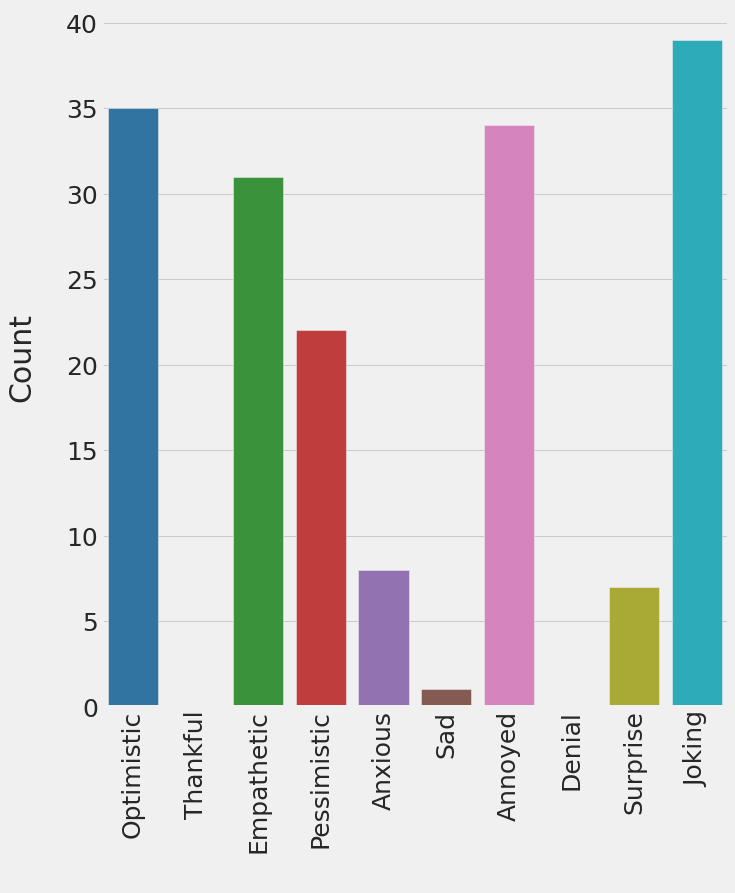

In [ ]:
total_df = pd.DataFrame()

for chapter in range(5,8):
  df = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_" + str(chapter) + ".csv")

  df = df.drop(['Verse', 'Official report'], axis=1)
  df = df.apply(pd.Series.value_counts)

  df['Optimistic'] = df['Optimistic'].fillna(0)
  df['Thankful'] = df['Thankful'].fillna(0)
  df['Empathetic'] = df['Empathetic'].fillna(0)
  df['Pessimistic'] = df['Pessimistic'].fillna(0)
  df['Anxious'] = df['Anxious'].fillna(0)
  df['Sad'] = df['Sad'].fillna(0)
  df['Annoyed'] = df['Annoyed'].fillna(0)
  df['Denial'] = df['Denial'].fillna(0)
  # df['Official report'] = df['Official report'].fillna(0)
  df['Surprise'] = df['Surprise'].fillna(0)
  df['Joking'] = df['Joking'].fillna(0)

  df = df.iloc[1]

  df = pd.DataFrame(df)

  df.columns = [ 'Count']

  total_df = total_df.append(df)

total_df = total_df.reset_index()
total_df = total_df.rename(columns={"index":"Sentiment"})
print(total_df)
new_df = pd.DataFrame({"Sentiment":["Optimistic", "Thankful", "Empathetic", "Pessimistic", "Anxious", "Sad", "Annoyed", "Denial", "Surprise", "Joking"], 
                       "Count":[0,0,0,0,0,0,0,0,0,0]})

for ii in range(0, 10):
  for jj in range(0,3):
    new_df.loc[ii, 'Count'] = (new_df.loc[ii, 'Count'] + total_df.loc[jj*10+ii, 'Count']).astype(int)

fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)


sns.barplot(x = new_df.Sentiment, y = new_df.Count, ax = ax, palette = sns.color_palette("tab10"))

plt.xticks(rotation=90)

plt.ylabel('Count', labelpad=30)
plt.xlabel(' ')
# plt.title('All Chapters', fontsize = 25,  pad=25)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))    # format decimals on the y-axis
plt.yticks(fontsize= 25)
plt.xticks(fontsize = 25)

## Chapter-wise Sentiments ##

In [ ]:
def chapter_wise_dataframe(path, chapter):
  
    df = pd.read_csv(path + str(chapter) + ".csv")

    df = df.drop(['Verse', 'Official report'], axis=1)
    df = df.apply(pd.Series.value_counts)

    df['Optimistic'] = df['Optimistic'].fillna(0)
    df['Thankful'] = df['Thankful'].fillna(0)
    df['Empathetic'] = df['Empathetic'].fillna(0)
    df['Pessimistic'] = df['Pessimistic'].fillna(0)
    df['Anxious'] = df['Anxious'].fillna(0)
    df['Sad'] = df['Sad'].fillna(0)
    df['Annoyed'] = df['Annoyed'].fillna(0)
    df['Denial'] = df['Denial'].fillna(0)
    # df['Official report'] = df['Official report'].fillna(0)
    df['Surprise'] = df['Surprise'].fillna(0)
    df['Joking'] = df['Joking'].fillna(0)
    print(df)
    df = df.iloc[1]
    print(df)
    df = pd.DataFrame(df)
    print(df)
    df.columns = ['Count']

    return df

     Optimistic  Thankful  Empathetic  Pessimistic  Anxious   Sad  Annoyed  \
0.0          33      48.0          34           39       44  48.0       30   
1.0          15       0.0          14            9        4   0.0       18   

     Denial  Surprise  Joking  
0.0    48.0        46      30  
1.0     0.0         2      18  
Optimistic     15.0
Thankful        0.0
Empathetic     14.0
Pessimistic     9.0
Anxious         4.0
Sad             0.0
Annoyed        18.0
Denial          0.0
Surprise        2.0
Joking         18.0
Name: 1.0, dtype: float64
              1.0
Optimistic   15.0
Thankful      0.0
Empathetic   14.0
Pessimistic   9.0
Anxious       4.0
Sad           0.0
Annoyed      18.0
Denial        0.0
Surprise      2.0
Joking       18.0
     Optimistic  Thankful  Empathetic  Pessimistic  Anxious   Sad  Annoyed  \
0.0          32      48.0          33           44       47  48.0       28   
1.0          16       0.0          15            4        1   0.0       20   

     Denia

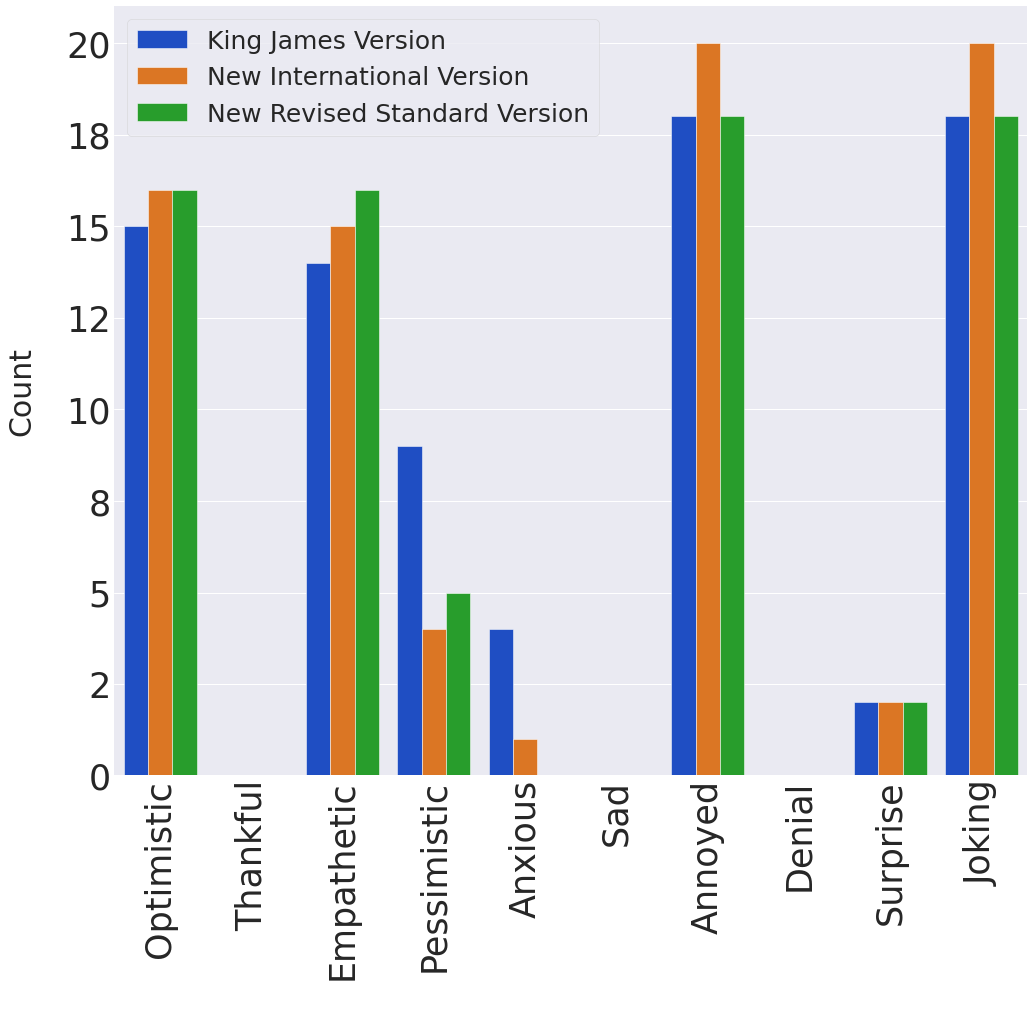

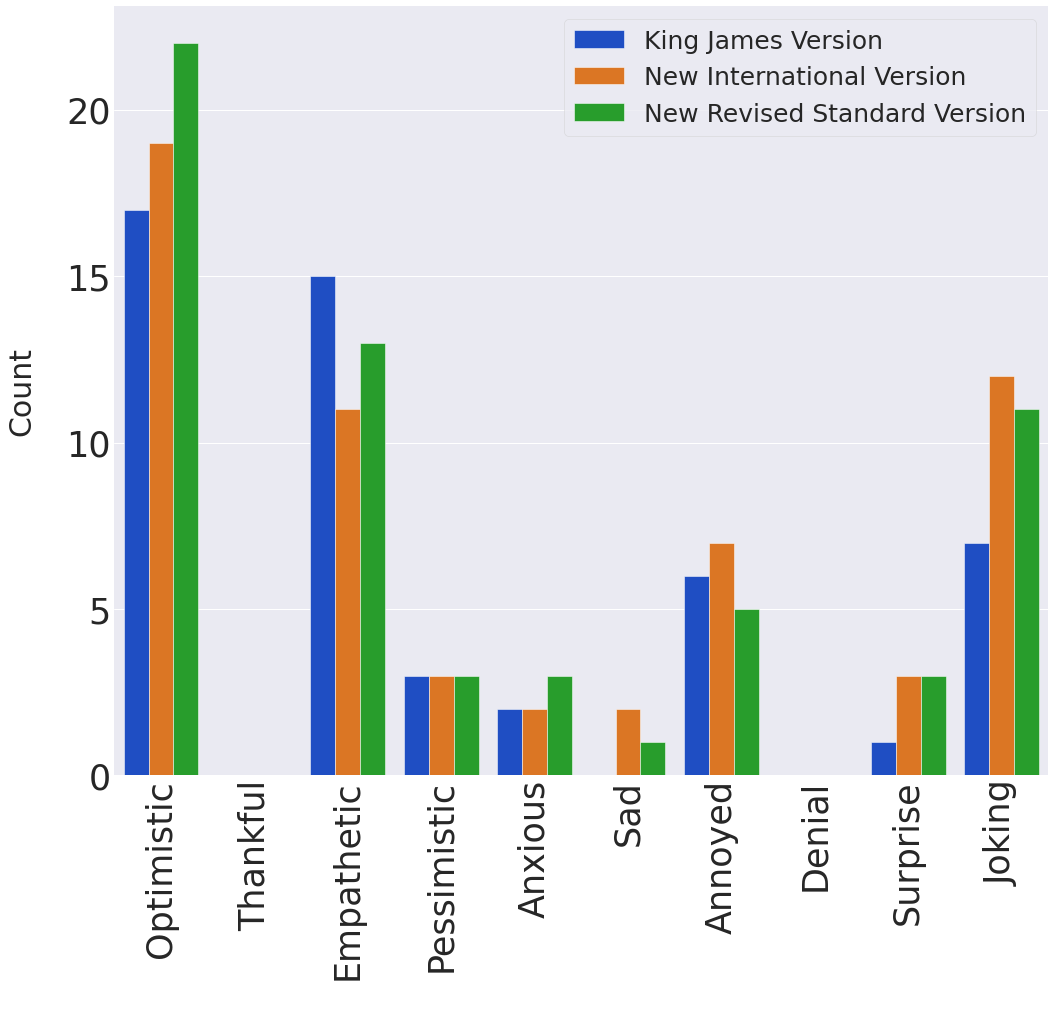

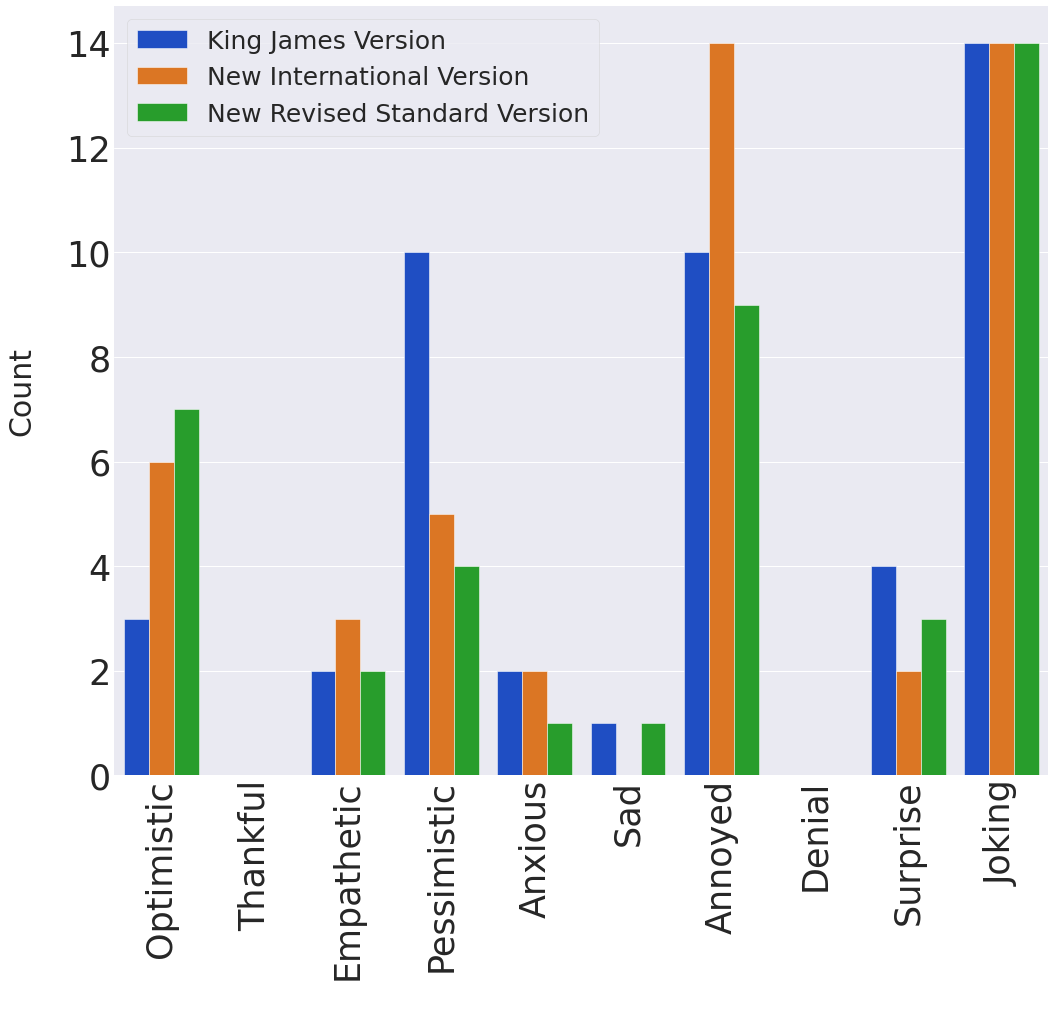

In [ ]:
for chapter in range(5,8):

  king_james_version = chapter_wise_dataframe("/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_", chapter)
  new_international_version = chapter_wise_dataframe("/content/drive/MyDrive/UNSW/Sermon On The Mount/New International Version/bert_NIV_chapter_", chapter)
  new_revised_standard_version = chapter_wise_dataframe("/content/drive/MyDrive/UNSW/Sermon On The Mount/New Revised Standard Version/bert_NRSV_chapter_", chapter)

  df_new = pd.concat([king_james_version['Count'], new_international_version['Count'], new_revised_standard_version['Count']], axis=1)
  
  df_new.columns = ['King James Version', 'New International Version', 'New Revised Standard Version'] 

  df_new = df_new.reset_index()

  df_new = df_new.rename(columns={"index":"Sentiment"})
  
  df_new = pd.melt(df_new, id_vars="Sentiment", var_name="Version", value_name="Count")
  
  colors = ["blue", "orange", "green"]  
  myPalette = sns.xkcd_palette(colors)

  sns.set_style("darkgrid")
  g = sns.factorplot(x='Sentiment', y='Count', hue='Version', data=df_new, kind='bar', size=12, aspect=1.2, palette = myPalette, legend=False)

  g.despine(left=True)

  # if chapter == 1 or chapter == 2 or chapter == 3 or chapter == 16 or chapter==17:
  #   plt.legend(loc='upper left',prop={"size":25})

  # else:
  #   plt.legend(loc='upper center',prop={"size":25})

  plt.legend(loc='best',prop={"size":25})

  plt.ylabel('Count', labelpad=30, fontsize=30)
  plt.xlabel(' ')

  plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))    # format decimals on the y-axis
  plt.yticks(fontsize= 35)
  plt.xticks(fontsize = 35)
  plt.xticks(rotation=90)


## Verse-wise Sentiments ##

## Jaccard Similarity Score ##

In [ ]:
from sklearn.metrics import jaccard_score

In [ ]:
kjv_chapter_five = pd.read_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_5.csv')
niv_chapter_five = pd.read_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/New International Version/bert_NIV_chapter_5.csv')
nrsv_chapter_five = pd.read_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/New Revised Standard Version/bert_NRSV_chapter_5.csv')

kjv_chapter_5 = kjv_chapter_five.drop(['Verse', 'Official report'], axis=1)
niv_chapter_5 = niv_chapter_five.drop(['Verse', 'Official report'], axis=1)
nrsv_chapter_5 = nrsv_chapter_five.drop(['Verse', 'Official report'], axis=1)

In [ ]:
row = kjv_chapter_5.iloc[46, :]
row

Optimistic     0.0
Thankful       0.0
Empathetic     0.0
Pessimistic    0.0
Anxious        0.0
Sad            0.0
Annoyed        1.0
Denial         0.0
Surprise       0.0
Joking         1.0
Name: 46, dtype: float64

In [ ]:
niv_chapter_5.iloc[46, :]

Optimistic     0.0
Thankful       0.0
Empathetic     0.0
Pessimistic    0.0
Anxious        0.0
Sad            0.0
Annoyed        1.0
Denial         0.0
Surprise       0.0
Joking         1.0
Name: 46, dtype: float64

In [ ]:
nrsv_chapter_5.iloc[46, :]

Optimistic     0.0
Thankful       0.0
Empathetic     0.0
Pessimistic    0.0
Anxious        0.0
Sad            0.0
Annoyed        0.0
Denial         0.0
Surprise       1.0
Joking         1.0
Name: 46, dtype: float64

In [ ]:
for ii in range(0, kjv_chapter_5.shape[0]):
  print(jaccard_score(kjv_chapter_5.iloc[ii, :],niv_chapter_5.iloc[ii, :]))

0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.3333333333333333
1.0
1.0
0.0
1.0
1.0
1.0
0.5
0.3333333333333333
0.0
0.0
0.0
0.5
1.0
1.0
0.25
0.3333333333333333
1.0
1.0
1.0
0.5
1.0
1.0
0.0
0.3333333333333333
0.0
1.0
0.3333333333333333
1.0
0.5
1.0
0.3333333333333333
0.5
1.0
0.5
1.0
1.0
1.0
1.0


In [ ]:
# df_es_mg = pd.DataFrame()
# df_es_ps = pd.DataFrame()
# df_mg_ps = pd.DataFrame()

# chapter_list = []
# es_mg_list = []
# es_ps_list = []
# mg_ps_list = []

# sum1 =0
# sum2=0
# sum3=0

# for chapter in range(1, 19):

#   if chapter==1 or chapter==2 or chapter==4 or chapter==6 or chapter==13 or chapter==14 or chapter==18:
#     continue

#   eknath_easwaran_chapter = pd.read_csv('/content/drive/MyDrive/religious_texts/eknath easwaran/predicted sentiment/chapter ' + str(chapter))
#   mahatma_gandhi_chapter = pd.read_csv('/content/drive/MyDrive/religious_texts/mahatma gandhi/predicted sentiment/chapter ' + str(chapter))
#   purohit_swami_chapter = pd.read_csv('/content/drive/MyDrive/religious_texts/purohit swami/predicted sentiment/chapter ' + str(chapter))

#   eknath_easwaran_chapter = eknath_easwaran_chapter.drop(['Unnamed: 0', 'Tweet', 'Official report'], axis=1)
#   mahatma_gandhi_chapter = mahatma_gandhi_chapter.drop(['Unnamed: 0', 'Tweet', 'Official report'], axis=1)
#   purohit_swami_chapter = purohit_swami_chapter.drop(['Unnamed: 0', 'Tweet', 'Official report'], axis=1)

#   for ii in range(0, eknath_easwaran_chapter.shape[0]):
#     es_ps_list.append(jaccard_score(eknath_easwaran_chapter.iloc[ii, :], purohit_swami_chapter.iloc[ii, :]))
#     es_mg_list.append(jaccard_score(eknath_easwaran_chapter.iloc[ii, :], mahatma_gandhi_chapter.iloc[ii, :]))
#     mg_ps_list.append(jaccard_score(purohit_swami_chapter.iloc[ii, :], mahatma_gandhi_chapter.iloc[ii, :]))

#   df_es_mg1 = pd.DataFrame(chapter_list, columns=['Chapter'])
#   df_es_mg2 = pd.DataFrame(es_mg_list, columns=['Easwaran Gandhi'])
#   df_es_mg = pd.concat([df_es_mg1, df_es_mg2], axis=1)
#   # df_es_mg.to_csv('/content/drive/MyDrive/religious_texts/jaccard score of predicted sentiments/easwaran_gandhi/chapter ' + str(chapter) + '.csv')

#   df_es_ps1 = pd.DataFrame(chapter_list, columns=['Chapter'])
#   df_es_ps2 = pd.DataFrame(es_ps_list, columns=['Purohit Easwaran'])
#   df_es_ps = pd.concat([df_es_ps1, df_es_ps2], axis=1)
#   # df_es_ps.to_csv('/content/drive/MyDrive/religious_texts/jaccard score of predicted sentiments/purohit_easwaran/chapter ' + str(chapter) + '.csv')

#   df_mg_ps1 = pd.DataFrame(chapter_list, columns=['Chapter'])
#   df_mg_ps2 = pd.DataFrame(mg_ps_list, columns=['Purohit Gandhi'])
#   df_mg_ps = pd.concat([df_mg_ps1, df_mg_ps2], axis=1)
#   # df_mg_ps.to_csv('/content/drive/MyDrive/religious_texts/jaccard score of predicted sentiments/gandhi_purohit/chapter ' + str(chapter) + '.csv')

#   print('Chapter ', str(chapter), ' Average')

#   print('Easwaran Gandhi ', df_es_mg['Easwaran Gandhi'].mean())
#   print('Easwaran Purohit Swami ', df_es_ps['Purohit Easwaran'].mean())
#   print('Purohit Swami and Gandhi ', df_mg_ps['Purohit Gandhi'].mean())

#   print('\n')

#   sum1+=df_es_mg['Easwaran Gandhi'].mean()
#   sum2+=df_es_ps['Purohit Easwaran'].mean()
#   sum3+=df_mg_ps['Purohit Gandhi'].mean()

### t-SNE

In [ ]:
!pip install scikit-learn
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 3)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ModuleNotFoundError: ignored

In [ ]:
tsne = TSNE(perplexity=50)
X_embedded = tsne.fit_transform(e)

NameError: ignored

In [ ]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=topic_df['Chapter'], legend='full', palette=palette)
plt.xlabel(xlabel='T-SNE dimension 1')
plt.ylabel(ylabel='T-SNE dimension 2')

plt.show()

### UMAP

In [ ]:
import datashader
import bokeh
import holoviews

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 7.5 MB/s 
     |████████████████████████████████| 1.1 MB 54.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=6df046bc22fcab329f9d003c345a0d78e0eecc61218f9a8e8fdf04ade70468b1
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=18b7b377c92868d1737b7fcafa5c729d2c753270d54c5812885a3182f8329546
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
import umap.plot
import umap

In [ ]:
e.shape

(333, 768)

In [ ]:
loaded_array = np.load('/content/drive/MyDrive/UNSW/Sermon On The Mount/all_chapters.npy')
topic_df = pd.read_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/metadata_all_chapters.tsv', sep='\t')

In [ ]:
loaded_array.shape


(333, 768)

In [ ]:
topic_df.shape

(333, 13)

In [ ]:
reducer = umap.UMAP(random_state=42, n_components=2, n_neighbors=70, min_dist=0.1)
reducer.fit(loaded_array)
embedding = reducer.transform(loaded_array)

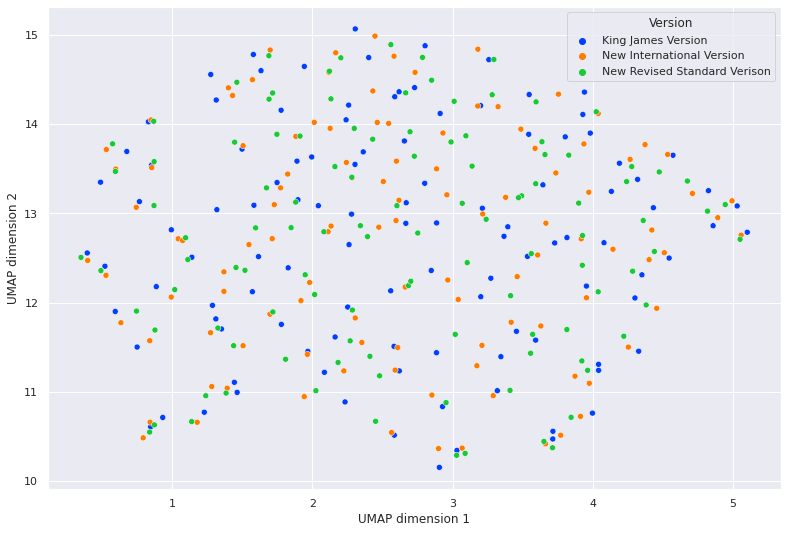

In [ ]:
sns.scatterplot(embedding[:,0], embedding[:,1], hue=topic_df['Version'], legend='full', palette=palette)
plt.xlabel(xlabel='UMAP dimension 1')
plt.ylabel(ylabel='UMAP dimension 2')

plt.show()

In [ ]:
len(embedding)

333

In [ ]:
len(embedding[0])

2

### UMAP Plot for Interactive Visualization of Verses

In [ ]:
hover_data = pd.DataFrame({'label': topic_df['Version']})
hover_data['item'] = topic_df['Verse']

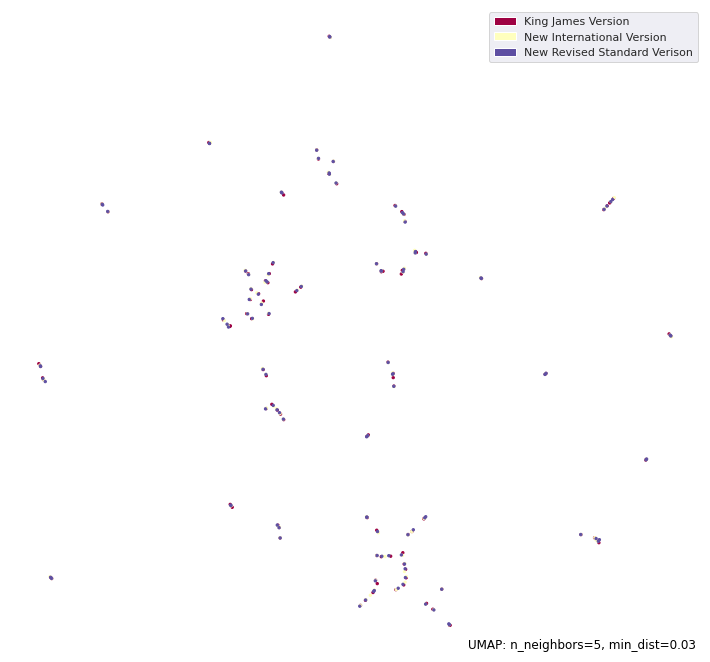

In [ ]:
mapper = umap.UMAP(random_state=42, n_neighbors=5, min_dist=0.03).fit(loaded_array)
umap.plot.points(mapper, labels = topic_df['Version'])

In [ ]:
umap.plot.output_notebook()

p = umap.plot.interactive(mapper, labels=topic_df['Version'], hover_data=hover_data, point_size=5, theme='blue')
umap.plot.show(p)

# Loading LSTM Model

In [ ]:
PATH = "/content/drive/MyDrive/UNSW/Sermon On The Mount/model7LSTM.pth"
import torch.nn as nn
class CustomLSTM(nn.Module):
    def __init__(self, embedding_dim, vocab, hidden_dim, output_dim, drop_prob, bidirectional = False, use_glove = True):
        super().__init__()
        self.embeddings = nn.Embedding(len(vocab), embedding_dim)
        if use_glove:
            self.embeddings.weight.data.copy_(vocab.vectors)
            self.embeddings.weight.requires_grad = False
        self.drop_prob = drop_prob

        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional = bidirectional, batch_first = True, num_layers = 2)
        if bidirectional is True:
            self.lin = nn.Linear(2*hidden_dim, 64)
        else:
            self.lin = nn.Linear(hidden_dim, 64)
        self.fc = nn.Linear(64, output_dim)
        self.dropout = nn.Dropout(p = drop_prob)
    
    def forward(self, sentence):
        #sentence = [max_len, batch_size]

        embed = self.embeddings(torch.transpose(sentence, 0, 1))
        #embed = [batch_size, max_len, embedding_dim]
        
        if self.drop_prob:
            embed = self.dropout(embed)
        
        lstm_out, (hidden, cell) = self.lstm(embed)
        #lstm_out = [batch_size, max_len, 2*hidden_dim if bidirectional else hidden_dim]
        #hidden = [num_layers, batch_size, hidden_dim]
        #cell = [num_layers, batch_size, hidden_dim]
        
        out = lstm_out[:,-1,:].squeeze()
        #out = [batch_size, 2*hidden_dim if bidirectional else hidden_dim]
        
        out = self.lin(out)
        #out = [batch_size, 64]

        outputs = self.fc(out)
        #outputs = [batch_size, output_dim]
        
        return outputs
model = torch.load(PATH)
model

CustomLSTM(
  (embeddings): Embedding(13666, 300)
  (lstm): LSTM(300, 128, num_layers=2, batch_first=True)
  (lin): Linear(in_features=128, out_features=64, bias=True)
  (fc): Linear(in_features=64, out_features=11, bias=True)
  (dropout): Dropout(p=0.65, inplace=False)
)

In [ ]:
import spacy
!pip install -U torchtext==0.10.0
import torchtext
from torchtext.legacy import data
spacy_en = spacy.load('en')
import re

def tokenizer(verse):
    verse = re.sub(r'[\n]', ' ', verse)
    return [tok.text for tok in spacy_en.tokenizer(verse)]

verse_field = data.Field(sequential = True, lower = True, tokenize = tokenizer)

dataFields = [("verse", verse_field), ("sentiment_score", None)]

train_dataset = data.TabularDataset(
    path = '/content/Chapter-5_cleaned.csv', format = 'csv', fields = dataFields, skip_header = True
    )

In [ ]:
print("length of dataset:", len(train_dataset))
!pip install tqdm
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
def build_vocab(sentences, verbose = True):
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except:
                vocab[word] = 1
    return vocab

length of dataset: 48


In [ ]:
VERSE = torchtext.legacy.data.Field(sequential = True, lower = True, tokenize = tokenizer)
# LABEL = torchtext.legacy.data.Field(sequential = False, use_vocab = False)
VERSE.build_vocab(train_dataset, vectors = 'glove.840B.300d')

verse_field.vocab = VERSE.vocab
BATCH_SIZE = 1
n_label = 11
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iter = data.BucketIterator(train_dataset,
                                batch_size = BATCH_SIZE,
                                sort_key = lambda x : len(x.verse),
                                sort_within_batch = False,
                                repeat = False,
                                shuffle = False,
                                device = device)

In [ ]:
class BatchWrapper():
    def __init__(self, dl, x_var, y_vars):
        self.dl = dl
        self.x_var = x_var
        self.y_vars = y_vars

    def __iter__(self):
        for batch in self.dl:
            x = getattr(batch, self.x_var)
            if self.y_vars is not None:
                y = torch.cat([getattr(batch, feat).unsqueeze(1) for feat in self.y_vars], dim = 1).float()
            else:
                y = torch.zeros((1))
            yield(x, y)
    
    def __len__(self):
        return len(self.dl)
train_dl = BatchWrapper(train_iter, "verse", None)

In [ ]:
i = 0
for x, y in train_dl:
    print(x.squeeze())
    i += 1
    if i == 10: break

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


In [ ]:
predicted_labels = []
sus = [33484, 62825]
i = 0
for X, y in train_dl:
    i += 1
    if i not in sus:
        preds = model(X)
        sig = nn.Sigmoid()
        out = sig(preds)

        out[out >= 0.5] = 1
        out[out < 0.5] = 0
        predicted_labels.append(out.detach().cpu().numpy().tolist())
        if i % 100 == 0:
            print("{}/{} iterations done".format(i, len(train_dl)))
    else:
        predicted_labels.append([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
len(predicted_labels)
len(predicted_labels[0])

11

In [ ]:
till_now = predicted_labels
predicted_labels

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.

In [ ]:
model_lstm = pd.DataFrame()
chapter5 = pd.read_csv("/content/Chapter-5_cleaned.csv")
model_lstm['Verse'] = chapter5['verse']
total_verses = chapter5.shape[0]
values = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * total_verses
model_lstm['list'] = values

In [ ]:
model_lstm['Optimistic'] = "None"
model_lstm['Thankful'] = "None"
model_lstm['Empathetic'] = "None"
model_lstm['Pessimistic'] = "None"
model_lstm['Anxious'] = "None"
model_lstm['Sad'] = "None"
model_lstm['Annoyed'] = "None"
model_lstm['Denial'] = "None"
model_lstm['Official report'] = "None"
model_lstm['Surprise'] = "None"
model_lstm['Joking'] = "None"
model_lstm = model_lstm.drop(['list'], axis = 1)

In [ ]:
for i in range(len(till_now)):
    model_lstm['Optimistic'].iloc[i] = till_now[i][0]
    model_lstm['Thankful'].iloc[i] = till_now[i][1]
    model_lstm['Empathetic'].iloc[i] = till_now[i][2]
    model_lstm['Pessimistic'].iloc[i] = till_now[i][3]
    model_lstm['Anxious'].iloc[i] = till_now[i][4]
    model_lstm['Sad'].iloc[i] = till_now[i][5]
    model_lstm['Annoyed'].iloc[i] = till_now[i][6]
    model_lstm['Denial'].iloc[i] = till_now[i][7]
    model_lstm['Official report'].iloc[i] = till_now[i][8]
    model_lstm['Surprise'].iloc[i] = till_now[i][9]
    model_lstm['Joking'].iloc[i] = till_now[i][10]

In [ ]:
model_lstm

Verse Optimistic Thankful  \
0   now when jesus saw the crowds he went up on a ...        0.0      0.0   
1                 and he began to teach them. he said        0.0      0.0   
2   blessed are the poor in spirit for theirs is t...        0.0      0.0   
3   blessed are those who mourn for they will be c...        0.0      0.0   
4   blessed are the meek for they will inherit the...        0.0      0.0   
5   blessed are those who hunger and thirst for ri...        0.0      0.0   
6   blessed are the merciful for they will be show...        0.0      0.0   
7   blessed are the pure in heart for they will se...        0.0      0.0   
8   blessed are the peacemakers for they will be c...        0.0      0.0   
9   blessed are those who are persecuted because o...        0.0      0.0   
10  blessed are you when people insult you persecu...        0.0      0.0   
11  rejoice and be glad because great is your rewa...        0.0      0.0   
12  you are the salt of the earth. but if the salt...        0.0      0.0   
13  you are the light of the world. a town built o...        0.0      0.0   
14  neither do people light a lamp and put it unde...        0.0      0.0   
15  in the same way let your light shine before ot...        0.0      0.0   
16  do not think that i have come to abolish the l...        1.0      0.0   
17  for truly i tell you until heaven and earth di...        0.0      0.0   
18  therefore anyone who sets aside one of the lea...        0.0      0.0   
19  for i tell you that unless your righteousness ...        0.0      0.0   
20  you have heard that it was said to the people ...        0.0      0.0   
21  but i tell you that anyone who is angry with a...        0.0      0.0   
22  therefore if you are offering your gift at the...        0.0      0.0   
23  leave your gift there in front of the altar. f...        0.0      0.0   
24  settle matters quickly with your adversary who...        0.0      0.0   
25  truly i tell you you will not get out until yo...        0.0      0.0   
26  you have heard that it was said you shall not ...        0.0      0.0   
27  but i tell you that anyone who looks at a woma...        0.0      0.0   
28  if your right eye causes you to stumble gouge ...        0.0      0.0   
29  and if your right hand causes you to stumble c...        0.0      0.0   
30  it has been said anyone who divorces his wife ...        0.0      0.0   
31  but i tell you that anyone who divorces his wi...        0.0      0.0   
32  again you have heard that it was said to the p...        0.0      0.0   
33  but i tell you do not swear an oath at all eit...        0.0      0.0   
34  or by the earth for it is his footstool or by ...        0.0      0.0   
35  and do not swear by your head for you cannot m...        0.0      0.0   
36  all you need to say is simply yes or no anythi...        1.0      0.0   
37  you have heard that it was said eye for eye an...        0.0      0.0   
38  but i tell you do not resist an evil person. i...        0.0      0.0   
39  and if anyone wants to sue you and take your s...        0.0      0.0   
40  if anyone forces you to go one mile go with th...        1.0      0.0   
41  give to the one who asks you and do not turn a...        0.0      0.0   
42  you have heard that it was said love your neig...        0.0      0.0   
43  but i tell you love your enemies and pray for ...        0.0      0.0   
44  that you may be children of your father in hea...        0.0      0.0   
45  if you love those who love you what reward wil...        0.0      0.0   
46  and if you greet only your own people what are...        0.0      0.0   
47  be perfect therefore as your heavenly father i...        0.0      0.0   

   Empathetic Pessimistic Anxious  Sad Annoyed Denial Official report  \
0         0.0         0.0     0.0  0.0     0.0    0.0             1.0   
1         0.0         0.0     0.0  0.0     0.0    0.0             1.0   
2         0.0         0.0     0.0  0.0     0.0    0.0  

# Semantic Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import math
import operator

In [ ]:
pd.options.display.max_colwidth = 250

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
sentences = []

for chapter in range(5, 8):

  king_james_version = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/King James Version/bert_KJV_chapter_" + str(chapter) + ".csv")
  new_international_version = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/New International Version/bert_NIV_chapter_" + str(chapter) + ".csv")
  new_revised_standard_version = pd.read_csv("/content/drive/MyDrive/UNSW/Sermon On The Mount/New Revised Standard Version/bert_NRSV_chapter_" + str(chapter) + ".csv")
  

  sentence1 = king_james_version['Verse'].tolist()
  sentence2 = new_international_version['Verse'].tolist()
  sentence3 = new_revised_standard_version['Verse'].tolist()

  sentences.append(sentence1)
  sentences.append(sentence2)
  sentences.append(sentence3)

  # print('Chapter - ', str(chapter), ' ', len(eknath_easwaran_chapter))

sentence_new = []
for i in range(0, len(sentences)):
  for j in range(0, len(sentences[i])):
    sentence_new.append(sentences[i][j])

sentence_embeddings = model.encode(sentence_new)

In [ ]:
sentence_embeddings.shape

(333, 768)

In [ ]:
df = pd.DataFrame(columns=['Chapter', 'Verse', 'KJV','NIV','NRSV','KJV - NIV','NIV - NRSV','NRSV - KJV'])

In [ ]:
print(sentence_new)
print(sentence_new[0])
print(sentence_new[48])
print(sentence_new[96])

['and seeing the crowd he went up into a mountain and when he was set his disciples came to him', 'and he opened his mouth and taught them saying', 'blessed are the poor in spirit for theirs is the kingdom of heaven.', 'blessed are they that mourn for they shall be comforted.', 'blessed are the meek for they shall inherit the earth.', 'blessed are they which do hunger and thirst after righteousness for they shall be filled.', 'blessed are the merciful for they shall obtain mercy.', 'blessed are the pure in heart for they shall see god.', 'blessed are the peacemakers for they shall be called the children of god.', 'blessed are they which are persecuted for righteousness sake for theirs is the kingdom of heaven.', 'blessed are you when men shall revile you and persecute you and shall say all manner of evil against you falsely for my sake.', 'rejoice and be exceeding glad for great is your reward in heaven for so persecuted they the prophets which were before you.', 'you are the salt of t

In [ ]:
i = 0
j = 48
k = 96
verse = 1

while(i<48):

  kjv_niv = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  niv_nrsv = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  nrsv_kjv = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [5], 'Verse': verse, 'KJV': [sentence_new[i]], 'NIV': [sentence_new[j]], 'NRSV': [sentence_new[k]],
                'KJV - NIV': [kjv_niv], 'NIV - NRSV': [niv_nrsv], 'NRSV - KJV': [nrsv_kjv]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

Chapter Verse  \
43       5    44   
44       5    45   
45       5    46   
46       5    47   
47       5    48   

                                                                                                                                                                    KJV  \
43            but i say to you love your enemies bless them that curse you do good to them that hate you and pray for them which despitefully use you and persecute you   
44  that you may be the children of your father which is in heaven for he make his sun to rise on the evil and on the good and send rain on the just and on the unjust.   
45                                                                     for if you love them which love you what reward have you do not even the tax collectors the same   
46                                                                   and if you salute your brother only what do you more than others do not even the tax collectors so   
47                                                                                          be you therefore perfect even as your father which is in heaven is perfect.   

                                                                                                                                                           NIV  \
43                                                                                       but i tell you love your enemies and pray for those who persecute you   
44  that you may be children of your father in heaven. he causes his sun to rise on the evil and the good and sends rain on the righteous and the unrighteous.   
45                                                          if you love those who love you what reward will you get are not even the tax collectors doing that   
46                                                        and if you greet only your own people what are you doing more than others do not even pagans do that   
47                                                                                                    be perfect therefore as your heavenly father is perfect.   

                                                                                                                                                                  NRSV  \
43                                                                                             but i say to you love your enemies and pray for those who persecute you   
44  so that you may be children of your father in heaven for he makes his sun rise on the evil and on the good and sends rain on the righteous and on the unrighteous.   
45                                                               for if you love those who love you what reward do you have do not even the tax collectors do the same   
46                                            and if you greet only your brothers and sisters what more are you doing than others do not even the gentiles do the same   
47                                                                                                            be perfect therefore as your heavenly father is perfect.   

    KJV - NIV  NIV - NRSV  NRSV - KJV  
43   0.877809    0.962752    0.889744  
44   0.868647    0.793876    0.764758  
45   0.825289    0.948573    0.857608  
46   0.484028    0.801457    0.622157  
47   0.866281    1.000000    0.866281

In [ ]:
print(sentence_new)
print(sentence_new[144])
print(sentence_new[178])
print(sentence_new[212])

['and seeing the crowd he went up into a mountain and when he was set his disciples came to him', 'and he opened his mouth and taught them saying', 'blessed are the poor in spirit for theirs is the kingdom of heaven.', 'blessed are they that mourn for they shall be comforted.', 'blessed are the meek for they shall inherit the earth.', 'blessed are they which do hunger and thirst after righteousness for they shall be filled.', 'blessed are the merciful for they shall obtain mercy.', 'blessed are the pure in heart for they shall see god.', 'blessed are the peacemakers for they shall be called the children of god.', 'blessed are they which are persecuted for righteousness sake for theirs is the kingdom of heaven.', 'blessed are you when men shall revile you and persecute you and shall say all manner of evil against you falsely for my sake.', 'rejoice and be exceeding glad for great is your reward in heaven for so persecuted they the prophets which were before you.', 'you are the salt of t

In [ ]:
i = 144
j = 178
k = 212
verse = 1

while(i<178):

  kjv_niv = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  niv_nrsv = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  nrsv_kjv = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [6], 'Verse': verse, 'KJV': [sentence_new[i]], 'NIV': [sentence_new[j]], 'NRSV': [sentence_new[k]],
                'KJV - NIV': [kjv_niv], 'NIV - NRSV': [niv_nrsv], 'NRSV - KJV': [nrsv_kjv]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

Chapter Verse  \
77       6    30   
78       6    31   
79       6    32   
80       6    33   
81       6    34   

                                                                                                                                                                 KJV  \
77  wherefore if god so clothes the grass of the field which to day is and to tomorrow is cast into the oven shall he not much more clothe you o you of little faith   
78                                                        therefore take no worry saying what shall we eat or what shall we drink or wherewithal shall we be clothed   
79                                               for after all these things do the pagans seek for your heavenly father know that you have need of all these things.   
80                                                           but seek you first the kingdom of god and his righteousness and all these things shall be added to you.   
81                   take therefore no worry for the tomorrow for the tomorrow shall take worry for the things of itself. sufficient to the day is the evil thereof.   

                                                                                                                                                                NIV  \
77  if that is how god clothes the grass of the field which is here today and tomorrow is thrown into the fire will he not much more clothe you you of little faith   
78                                                                            so do not worry saying what shall we eat or what shall we drink or what shall we wear   
79                                                                     for the pagans run after all these things and your heavenly father knows that you need them.   
80                                                              but seek first his kingdom and his righteousness and all these things will be given to you as well.   
81                                              therefore do not worry about tomorrow for tomorrow will worry about itself. each day has enough trouble of its own.   

                                                                                                                                                           NRSV  \
77  but if god so clothes the grass of the field which is alive today and tomorrow is thrown into the oven will he not much more clothe you you of little faith   
78                                                                    therefore do not worry saying what will we eat or what will we drink or what will we wear   
79                                 for it is the gentiles who strive for all these things and indeed your heavenly father knows that you need all these things.   
80                                             but strive first for the kingdom of god and his righteousness and all these things will be given to you as well.   
81                                              so do not worry about tomorrow for tomorrow will bring worries of its own. today s trouble is enough for today.   

    KJV - NIV  NIV - NRSV  NRSV - KJV  
77   0.838053    0.916886    0.906441  
78   0.850372    0.821390    0.693892  
79   0.906146    0.599250    0.616657  
80   0.884167    0.921624    0.868923  
81   0.858945    0.932601    0.836836

In [ ]:
print(sentence_new)
print(sentence_new[246])
print(sentence_new[275])
print(sentence_new[304])

['and seeing the crowd he went up into a mountain and when he was set his disciples came to him', 'and he opened his mouth and taught them saying', 'blessed are the poor in spirit for theirs is the kingdom of heaven.', 'blessed are they that mourn for they shall be comforted.', 'blessed are the meek for they shall inherit the earth.', 'blessed are they which do hunger and thirst after righteousness for they shall be filled.', 'blessed are the merciful for they shall obtain mercy.', 'blessed are the pure in heart for they shall see god.', 'blessed are the peacemakers for they shall be called the children of god.', 'blessed are they which are persecuted for righteousness sake for theirs is the kingdom of heaven.', 'blessed are you when men shall revile you and persecute you and shall say all manner of evil against you falsely for my sake.', 'rejoice and be exceeding glad for great is your reward in heaven for so persecuted they the prophets which were before you.', 'you are the salt of t

In [ ]:
i = 246
j = 275
k = 304
verse = 1

while(i<275):

  kjv_niv = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  niv_nrsv = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  nrsv_kjv = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [7], 'Verse': verse, 'KJV': [sentence_new[i]], 'NIV': [sentence_new[j]], 'NRSV': [sentence_new[k]],
                'KJV - NIV': [kjv_niv], 'NIV - NRSV': [niv_nrsv], 'NRSV - KJV': [nrsv_kjv]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

Chapter Verse  \
106       7    25   
107       7    26   
108       7    27   
109       7    28   
110       7    29   

                                                                                                                                        KJV  \
106  and the rain descended and the floods came and the winds blew and beat upon that house and it fell not for it was founded upon a rock.   
107     and every one that hears these sayings of mine and does them not shall be like to a foolish man which built his house upon the sand   
108        and the rain descended and the floods came and the winds blew and beat upon that house and it fell and great was the fall of it.   
109                                       and it came to pass when jesus had ended these sayings the people were astonished at his doctrine   
110                                                                      for he taught them as one having authority and not as the scribes.   

                                                                                                                                                   NIV  \
106  the rain came down the streams rose and the winds blew and beat against that house yet it did not fall because it had its foundation on the rock.   
107                  but everyone who hears these words of mine and does not put them into practice is like a foolish man who built his house on sand.   
108                                 the rain came down the streams rose and the winds blew and beat against that house and it fell with a great crash.   
109                                                                 when jesus had finished saying these things the crowds were amazed at his teaching   
110                                                                   because he taught as one who had authority and not as their teachers of the law.   

                                                                                                                                 NRSV  \
106  the rain fell the floods came and the winds blew and beat on that house but it did not fall because it had been founded on rock.   
107       and everyone who hears these words of mine and does not act on them will be like a foolish man who built his house on sand.   
108               the rain fell and the floods came and the winds blew and beat against that house and it fell and great was its fall   
109                                         now when jesus had finished saying these things the crowds were astounded at his teaching   
110                                                              for he taught them as one having authority and not as their scribes.   

     KJV - NIV  NIV - NRSV  NRSV - KJV  
106   0.823699    0.927564    0.904683  
107   0.867055    0.890799    0.866785  
108   0.869582    0.933076    0.912894  
109   0.716673    0.952777    0.764110  
110   0.766533    0.764654    0.990784

In [ ]:
df.shape

(111, 8)

In [ ]:
df.to_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/semantic analysis/cosine_similarity.csv')

## Exploring Key Verses with low cosine similarity

In [ ]:
maximum_difference_kjv_niv = df.loc[(df['KJV - NIV'] < 0.5)]
maximum_difference_kjv_niv

Chapter Verse  \
46       5    47   

                                                                                                   KJV  \
46  and if you salute your brother only what do you more than others do not even the tax collectors so   

                                                                                                     NIV  \
46  and if you greet only your own people what are you doing more than others do not even pagans do that   

                                                                                                                        NRSV  \
46  and if you greet only your brothers and sisters what more are you doing than others do not even the gentiles do the same   

    KJV - NIV  NIV - NRSV  NRSV - KJV  
46   0.484028    0.801457    0.622157

In [ ]:
maximum_difference_kjv_niv.shape

(1, 8)

In [ ]:
maximum_difference_niv_nrsv = df.loc[(df['NIV - NRSV'] < 0.5)]
maximum_difference_niv_nrsv

Empty DataFrame
Columns: [Chapter, Verse, KJV, NIV, NRSV, KJV - NIV, NIV - NRSV, NRSV - KJV]
Index: []

In [ ]:
maximum_difference_niv_nrsv.shape

(0, 8)

In [ ]:
maximum_difference_nrsv_kjv = df.loc[(df['NRSV - KJV'] < 0.5)]
maximum_difference_nrsv_kjv

Chapter Verse  \
24       5    25   

                                                                                                                                                                                                   KJV  \
24  agree with your adversary quickly whiles you art in the way with him lest at any time the adversary deliver you to the judge and the judge deliver you to the officer and you be cast into prison.   

                                                                                                                                                                                                                                                        NIV  \
24  settle matters quickly with your adversary who is taking you to court. do it while you are still together on the way or your adversary may hand you over to the judge and the judge may hand you over to the officer and you may be thrown into prison.   

                                                                                                                                                                                                NRSV  \
24  come to terms quickly with your accuser while you are on the way to court with him or your accuser may hand you over to the judge and the judge to the guard and you will be thrown into prison.   

    KJV - NIV  NIV - NRSV  NRSV - KJV  
24   0.545241    0.675177    0.453388

In [ ]:
maximum_difference_nrsv_kjv.shape

(1, 8)

## Most Similar Verses

In [ ]:
df.head(2)

Chapter Verse  \
0       5     1   
1       5     2   

                                                                                             KJV  \
0  and seeing the crowd he went up into a mountain and when he was set his disciples came to him   
1                                                 and he opened his mouth and taught them saying   

                                                                                                  NIV  \
0  now when jesus saw the crowds he went up on a mountainside and sat down. his disciples came to him   
1                                                                 and he began to teach them. he said   

                                                                                                 NRSV  \
0  when jesus saw the crowds he went up the mountain and after he sat down his disciples came to him.   
1                                                       then he began to speak and taught them saying   

   KJV - NIV  NIV - NRSV  NRSV - KJV  
0   0.899810    0.955128    0.907547  
1   0.830086    0.860022    0.892075

In [ ]:
df['total'] = df['KJV - NIV'] + df['NIV - NRSV'] + df['NRSV - KJV']
df.head(2)

Chapter Verse  \
0       5     1   
1       5     2   

                                                                                             KJV  \
0  and seeing the crowd he went up into a mountain and when he was set his disciples came to him   
1                                                 and he opened his mouth and taught them saying   

                                                                                                  NIV  \
0  now when jesus saw the crowds he went up on a mountainside and sat down. his disciples came to him   
1                                                                 and he began to teach them. he said   

                                                                                                 NRSV  \
0  when jesus saw the crowds he went up the mountain and after he sat down his disciples came to him.   
1                                                       then he began to speak and taught them saying   

   KJV - NIV  NIV - NRSV  NRSV - KJV     total  
0   0.899810    0.955128    0.907547  2.762485  
1   0.830086    0.860022    0.892075  2.582183

In [ ]:
df['max sum'] = df.groupby(['Chapter'])['total'].transform('max')
df.head(2)

Chapter Verse  \
0       5     1   
1       5     2   

                                                                                             KJV  \
0  and seeing the crowd he went up into a mountain and when he was set his disciples came to him   
1                                                 and he opened his mouth and taught them saying   

                                                                                                  NIV  \
0  now when jesus saw the crowds he went up on a mountainside and sat down. his disciples came to him   
1                                                                 and he began to teach them. he said   

                                                                                                 NRSV  \
0  when jesus saw the crowds he went up the mountain and after he sat down his disciples came to him.   
1                                                       then he began to speak and taught them saying   

   KJV - NIV  NIV - NRSV  NRSV - KJV     total  max sum  
0   0.899810    0.955128    0.907547  2.762485      3.0  
1   0.830086    0.860022    0.892075  2.582183      3.0

In [ ]:
df_max_sum = df.loc[(df['max sum'] == df['total'])]
df_max_sum

Chapter Verse  \
2        5     3   
68       6    21   
92       7    11   

                                                                                                                                                             KJV  \
2                                                                                            blessed are the poor in spirit for theirs is the kingdom of heaven.   
68                                                                                                     for where your treasure is there will your heart be also.   
92  if you then being evil know how to give good gifts to your children how much more shall your father which is in heaven give good things to them that ask him   

                                                                                                                                                           NIV  \
2                                                                                          blessed are the poor in spirit for theirs is the kingdom of heaven.   
68                                                                                                   for where your treasure is there your heart will be also.   
92  if you then though you are evil know how to give good gifts to your children how much more will your father in heaven give good gifts to those who ask him   

                                                                                                                                                    NRSV  \
2                                                                                    blessed are the poor in spirit for theirs is the kingdom of heaven.   
68                                                                                             for where your treasure is there your heart will be also.   
92  if you then who are evil know how to give good gifts to your children how much more will your father in heaven give good things to those who ask him   

    KJV - NIV  NIV - NRSV  NRSV - KJV     total   max sum  
2    1.000000    1.000000    1.000000  3.000000  3.000000  
68   0.986851    1.000000    0.986851  2.973701  2.973701  
92   0.970931    0.984832    0.975371  2.931135  2.931135

In [ ]:
df_max_sum.to_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/semantic analysis/max_sum_in_every_chapter.csv')

## Least Similar Verses

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/semantic analysis/cosine_similarity.csv')

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
print('KJV - NIV mean - ', df['KJV - NIV'].mean())
print('KJV - NIV std - ', df['KJV - NIV'].std())
print('NIV - NRSV mean - ', df['NIV - NRSV'].mean())
print('NIV - NRSV std - ', df['NIV - NRSV'].std())
print('NRSV - KJV mean - ', df['NRSV - KJV'].mean())
print('NRSV - KJV std - ', df['NRSV - KJV'].std())

KJV - NIV mean -  0.8412230262162161
KJV - NIV std -  0.09804027064541677
NIV - NRSV mean -  0.8981880865765764
NIV - NRSV std -  0.08926412040239154
NRSV - KJV mean -  0.8416544227027029
NRSV - KJV std -  0.1173882737458775


In [ ]:
df['total'] = df['KJV - NIV'] + df['NIV - NRSV'] + df['NRSV - KJV']
df.head()

Chapter  Verse  \
0        5      1   
1        5      2   
2        5      3   
3        5      4   
4        5      5   

                                                                                             KJV  \
0  and seeing the crowd he went up into a mountain and when he was set his disciples came to him   
1                                                 and he opened his mouth and taught them saying   
2                            blessed are the poor in spirit for theirs is the kingdom of heaven.   
3                                       blessed are they that mourn for they shall be comforted.   
4                                         blessed are the meek for they shall inherit the earth.   

                                                                                                  NIV  \
0  now when jesus saw the crowds he went up on a mountainside and sat down. his disciples came to him   
1                                                                 and he began to teach them. he said   
2                                 blessed are the poor in spirit for theirs is the kingdom of heaven.   
3                                             blessed are those who mourn for they will be comforted.   
4                                               blessed are the meek for they will inherit the earth.   

                                                                                                 NRSV  \
0  when jesus saw the crowds he went up the mountain and after he sat down his disciples came to him.   
1                                                       then he began to speak and taught them saying   
2                                 blessed are the poor in spirit for theirs is the kingdom of heaven.   
3                                             blessed are those who mourn for they will be comforted.   
4                                               blessed are the meek for they will inherit the earth.   

   KJV - NIV  NIV - NRSV  NRSV - KJV     total  
0   0.899810    0.955128    0.907547  2.762485  
1   0.830086    0.860022    0.892076  2.582183  
2   1.000000    1.000000    1.000000  3.000000  
3   0.977548    1.000000    0.977548  2.955095  
4   0.992251    1.000000    0.992251  2.984503

In [ ]:
df['min sum'] = df.groupby(['Chapter'])['total'].transform('min')
df.head()

Chapter  Verse  \
0        5      1   
1        5      2   
2        5      3   
3        5      4   
4        5      5   

                                                                                             KJV  \
0  and seeing the crowd he went up into a mountain and when he was set his disciples came to him   
1                                                 and he opened his mouth and taught them saying   
2                            blessed are the poor in spirit for theirs is the kingdom of heaven.   
3                                       blessed are they that mourn for they shall be comforted.   
4                                         blessed are the meek for they shall inherit the earth.   

                                                                                                  NIV  \
0  now when jesus saw the crowds he went up on a mountainside and sat down. his disciples came to him   
1                                                                 and he began to teach them. he said   
2                                 blessed are the poor in spirit for theirs is the kingdom of heaven.   
3                                             blessed are those who mourn for they will be comforted.   
4                                               blessed are the meek for they will inherit the earth.   

                                                                                                 NRSV  \
0  when jesus saw the crowds he went up the mountain and after he sat down his disciples came to him.   
1                                                       then he began to speak and taught them saying   
2                                 blessed are the poor in spirit for theirs is the kingdom of heaven.   
3                                             blessed are those who mourn for they will be comforted.   
4                                               blessed are the meek for they will inherit the earth.   

   KJV - NIV  NIV - NRSV  NRSV - KJV     total   min sum  
0   0.899810    0.955128    0.907547  2.762485  1.673807  
1   0.830086    0.860022    0.892076  2.582183  1.673807  
2   1.000000    1.000000    1.000000  3.000000  1.673807  
3   0.977548    1.000000    0.977548  2.955095  1.673807  
4   0.992251    1.000000    0.992251  2.984503  1.673807

In [ ]:
df_least_sum = df.loc[(df['min sum'] == df['total'])]
df_least_sum

Chapter  Verse  \
24         5     25   
48         6      1   
104        7     23   

                                                                                                                                                                                                    KJV  \
24   agree with your adversary quickly whiles you art in the way with him lest at any time the adversary deliver you to the judge and the judge deliver you to the officer and you be cast into prison.   
48                                                            take attention that you do not your charity before men to be seen of them otherwise you have no reward of your father which is in heaven.   
104                                                                                                                and then will i tell to them i never knew you depart from me you that work immoraly.   

                                                                                                                                                                                                                                                         NIV  \
24   settle matters quickly with your adversary who is taking you to court. do it while you are still together on the way or your adversary may hand you over to the judge and the judge may hand you over to the officer and you may be thrown into prison.   
48                                                                                                        be careful not to practice your righteousness in front of others to be seen by them. if you do you will have no reward from your father in heaven.   
104                                                                                                                                                                               then i will tell them plainly i never knew you. away from me you evildoers   

                                                                                                                                                                                                 NRSV  \
24   come to terms quickly with your accuser while you are on the way to court with him or your accuser may hand you over to the judge and the judge to the guard and you will be thrown into prison.   
48                                                                  beware of practising your piety before others in order to be seen by them for then you have no reward from your father in heaven.   
104                                                                                                                       then i will declare to them i never knew you go away from me you evildoers.   

     KJV - NIV  NIV - NRSV  NRSV - KJV     total   min sum  
24    0.545241    0.675177    0.453388  1.673807  1.673807  
48    0.628053    0.735941    0.651455  2.015449  2.015449  
104   0.637973    0.908879    0.701172  2.248025  2.248025

In [ ]:
df_least_sum.to_csv('/content/drive/MyDrive/UNSW/Sermon On The Mount/semantic analysis/least_sum_in_every_chapter.csv')

## Average Cosine Similarity in a Chapter

In [ ]:
df_mean_kjv_niv = df.groupby('Chapter')['KJV - NIV'].mean().reset_index()
df_mean_niv_nrsv = df.groupby('Chapter')['NIV - NRSV'].mean().reset_index()
df_mean_nrsv_kjv = df.groupby('Chapter')['NRSV - KJV'].mean().reset_index()

df_std_kjv_niv = df.groupby('Chapter')['KJV - NIV'].std().reset_index()
df_std_niv_nrsv = df.groupby('Chapter')['NIV - NRSV'].std().reset_index()
df_std_nrsv_kjv = df.groupby('Chapter')['NRSV - KJV'].std().reset_index()

In [ ]:
df_std_kjv_niv

Chapter  KJV - NIV
0        5   0.113394
1        6   0.091247
2        7   0.077987

In [ ]:
df_std_niv_nrsv

Chapter  NIV - NRSV
0        5    0.086598
1        6    0.103672
2        7    0.075161

In [ ]:
df_std_nrsv_kjv

Chapter  NRSV - KJV
0        5    0.123865
1        6    0.121945
2        7    0.103099

In [ ]:
df_mean_kjv_niv

Chapter  KJV - NIV
0        5   0.831820
1        6   0.850821
2        7   0.845534

In [ ]:
df_mean_niv_nrsv

Chapter  NIV - NRSV
0        5    0.909612
1        6    0.890819
2        7    0.887919

In [ ]:
df_mean_nrsv_kjv

Chapter  NRSV - KJV
0        5    0.849816
1        6    0.832319
2        7    0.839091

In [ ]:
df_std_kjv_niv['KJV - NIV'].mean()

0.09420949162465274

In [ ]:
df_std_niv_nrsv['NIV - NRSV'].mean()

0.08847698257178632

In [ ]:
df_std_nrsv_kjv['NRSV - KJV'].mean()

0.11630288799460142

## KeyWord Extraction using KeyBERT

In [ ]:
!pip install keybert
from keybert import KeyBERT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 232 kB 23.5 MB/s 
     |████████████████████████████████| 51 kB 7.4 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=5673773659e9e38125ab95dd618bf8292e8a602a22866c9951281c80db1bf417
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
Successfully built keybert


In [ ]:
kw_model = KeyBERT(model = 'all-mpnet-base-v2')